In [209]:
import pandas as pd 
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt##
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
!pip install scikit-learn
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
import numpy as n
from sklearn.naive_bayes import GaussianNB
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
import warnings
from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler
import math
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler




Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [347]:
heart1 =  pd.read_csv('/content/sample_data/heart.csv')
heart2 =  pd.read_csv('/content/sample_data/heart2.csv')

In [348]:
# list of our datasets
heart = [heart1,heart2] 
# concat datasets
heart_df = pd.concat(heart,ignore_index = True)

In [349]:
# remove duplicates from heart_df
heart_df = heart_df.drop_duplicates(ignore_index = True)

In [350]:
# saving our data in csv file
heart_df.to_csv('heart_df.csv', index=False, encoding='utf-8-sig')

In [351]:
# this function return nubers of NaN in each coulmn
x = heart_df.isna().sum() 
#this function put the mean of the column instead the Nan that appear in this column.
heart_df = heart_df.fillna(heart_df.mean())

In [352]:
heart_df

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     52    1   0       125   212    0        1      168      0      1.0   
1     53    1   0       140   203    1        0      155      1      3.1   
2     70    1   0       145   174    0        1      125      1      2.6   
3     61    1   0       148   203    0        1      161      0      0.0   
4     62    0   0       138   294    1        1      106      0      1.9   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
297   68    0   2       120   211    0        0      115      0      1.5   
298   44    0   2       108   141    0        1      175      0      0.6   
299   52    1   0       128   255    0        1      161      1      0.0   
300   59    1   3       160   273    0        0      125      0      0.0   
301   54    1   0       120   188    0        1      113      0      1.4   

     slope  ca  thal  target  
0        2   2     3       0  
1        0   0     3       0  
2        0   0     3       0  
3        2   1     3       0  
4        1   3     2       0  
..     ...  ..   ...     ...  
297      1   0     2       1  
298      1   0     2       1  
299      2   1     3       0  
300      2   0     2       0  
301      1   1     3       0  

[302 rows x 14 columns]

**Preprocessing**

In [353]:
# min max scalar function
def min_max(df,name):
  scaler = MinMaxScaler()
  df[name] = scaler.fit_transform(df[[name]])
# copy = heart_df
# min_max(copy,'age')
# copy

In [354]:
# Normalization by decimal scaling
def Normatilzation(df,name):
  max = df[name].max() 
  print(max)
  df[name] = df[name]/10**len(str(max))
# Normatilzation(heart_df,'chol')
# heart_df

In [355]:
# zscor function
def zscore(df,name):
  df[name] = stats.zscore(df[name])
# zscore(copy,"trestbps")
# copy

In [356]:
#this function creat our bin boundaries df is the data, name = the name of column, k = num of bins
def big_bin_boundaries(df,name,k):
  # sort df by the col we get (name)
  def sort_df_by_column(df, name):
    df_sorted = df.sort_values(name)
    return df_sorted 
  sorted_df = sort_df_by_column(df, name)
  # print(sorted_df)
  # creat list of values from this col 
  def values_from_col(df,name):
    values = []
    for index, row in df.iterrows():
      values.append(row[name])
      values = sorted(values)
    return values
  values = values_from_col(sorted_df,name)
  # print(df)
  # print(values)
  length = len(values)
 #div of bins
  def div(k):
    # k = 100  # Number of bins
    lst = values_from_col(sorted_df,name)
    bin_size = len(lst) // k
    remainder = len(lst) % k
    new_lst = [lst[i*bin_size:(i+1)*bin_size] for i in range(k)]
    if remainder:
        new_lst[-1] += lst[-remainder:]
    return new_lst

  new_lst = div(k)
  # the real activation of bin boundaries
  def BinBoundaries(df,name,bins):
    # treat of one bin boundaries
    def one_bin(bin):
      l = []
      min = bin[0]
      max = bin[len(bin)-1]
      for val in bin:
        if abs(val - min) < abs(max - val):
          l.append(min)
        else:
          l.append(max)
      return l
    # one_bin k times
    def boundaries(bins):
      lst = []
      big_lst = []
      for bin in bins:
        lst.append(one_bin(bin))
      flattened_list = []
      for sublist in lst:
          for item in sublist:
              big_lst.append(item)
      return big_lst
    bin_boundaries = boundaries(bins)
    df[name] = bin_boundaries
    return df
  return BinBoundaries(sorted_df,name, new_lst) 

# big_bin_boundaries(heart_df,'chol',3)


In [357]:
#this function creat our bin mean df is the data, name = the name of column, k = num of bins
def big_bin_mean(df,name,k):
  # sort df by the col we get (name)
  def sort_df_by_column(df, name):
    df_sorted = df.sort_values(name)
    return df_sorted
  sorted_df = sort_df_by_column(heart_df, name)
  # creat list of values from this col 
  def values_from_col(df,name):
    values = []
    for index, row in df.iterrows():
      values.append(row[name])
      values = sorted(values)
    return values
  values = values_from_col(sorted_df,name)
  # print(df)
  length = len(values)
 #div of bins
  def div(k):
    lst = values_from_col(heart_df,name)
    bin_size = len(lst) // k
    remainder = len(lst) % k
    new_lst = [lst[i*bin_size:(i+1)*bin_size] for i in range(k)]
    if remainder:
        new_lst[-1] += lst[-remainder:]
    return new_lst
  new_lst = div(k)

  # the real activation of bin mean
  def BinMean(df,name,bins):
    # treat of one bin mean
    def one_bin(bin):
      mean_value = sum(bin) / len(bin)  # Calculate the mean of the list
      new_list = [mean_value] * len(bin)  # Create a new list with the mean value repeated
      return new_list
    def mean(bins):
      lst = []
      big_lst = []
      for bin in bins:
        lst.append(one_bin(bin))
      flattened_list = []
      for sublist in lst:
          for item in sublist:
              big_lst.append(item)
      return big_lst
    bin_mean = mean(bins)
    df[name] = bin_mean
    return df
  return BinMean(sorted_df,name, new_lst) 

# big_bin_mean(heart_df,'trestbps',100)


In [358]:
heart_df.to_csv('copy_of_heart.csv', index=False, encoding='utf-8-sig')

***evaluation measures***




In [359]:
# this function create confusiom matrix with y_test and y_pred_pre
def confusionMatrix(y_test, y_pred_pre,modle):
  #using counfusion_matrix from sklearn.metrics 
  cm = confusion_matrix(y_test, y_pred_pre)
  # set size of cm
  plt.figure(figsize=(8, 6))
  # name of axises
  cm=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
  sns.heatmap(cm, annot=True, cmap="summer", fmt="d")
  plt.title(modle)
  # print the values of cm
  print(f"TN = {cm.at['Actual:0', 'Predicted:0']}\nTP = {cm.at['Actual:1', 'Predicted:1']}\n"
          f"FN = {cm.at['Actual:1', 'Predicted:0']}\nFP = {cm.at['Actual:0', 'Predicted:1']}")

In [360]:
# this function calculate accuracy with y_test and y_pred_pre
def accuracy_pre(y_test, y_pred_pre):
  #using accuracy_score from sklearn.metrics 
  accuracy_pre1 = accuracy_score(y_test, y_pred_pre)
  print('Accuracy:', accuracy_pre1)

In [361]:
# this function calculate f_measure with y_test and y_pred_pre
def f_measure(y_test, y_pred_pre):
  #using f1_measure from sklearn.metrics 
  f_measure1 = f1_score(y_test, y_pred_pre)
  print("F-measure:", f_measure1)

In [362]:
# this function calculate precision with y_test and y_pred_pre
def precision(y_test, y_pred_pre):
  #using precision_score from sklearn.metrics   
  precision1 = precision_score(y_test, y_pred_pre, labels=None, pos_label=1, average='binary', sample_weight=None, zero_division='warn')
  print("Precision:", precision1)


In [363]:
# this function calculate recall with y_test and y_pred_pre
def recall(y_test, y_pred_pre):
  #using recall_score from sklearn.metrics   
  recall1 = recall_score(y_test, y_pred_pre, labels=None, pos_label=1, average='binary', sample_weight=None, zero_division='warn')
  print("Recall:", recall1)


In [364]:
#this function print the resulr of accuracy,f_measure,precision and recall 
def evaluation_measures(y_test1,y_predict1):
  accuracy_pre(y_test1, y_predict1)
  f_measure(y_test1, y_predict1)
  precision(y_test1, y_predict1)
  recall(y_test1, y_predict1)



**Feature Selection - Correlation**

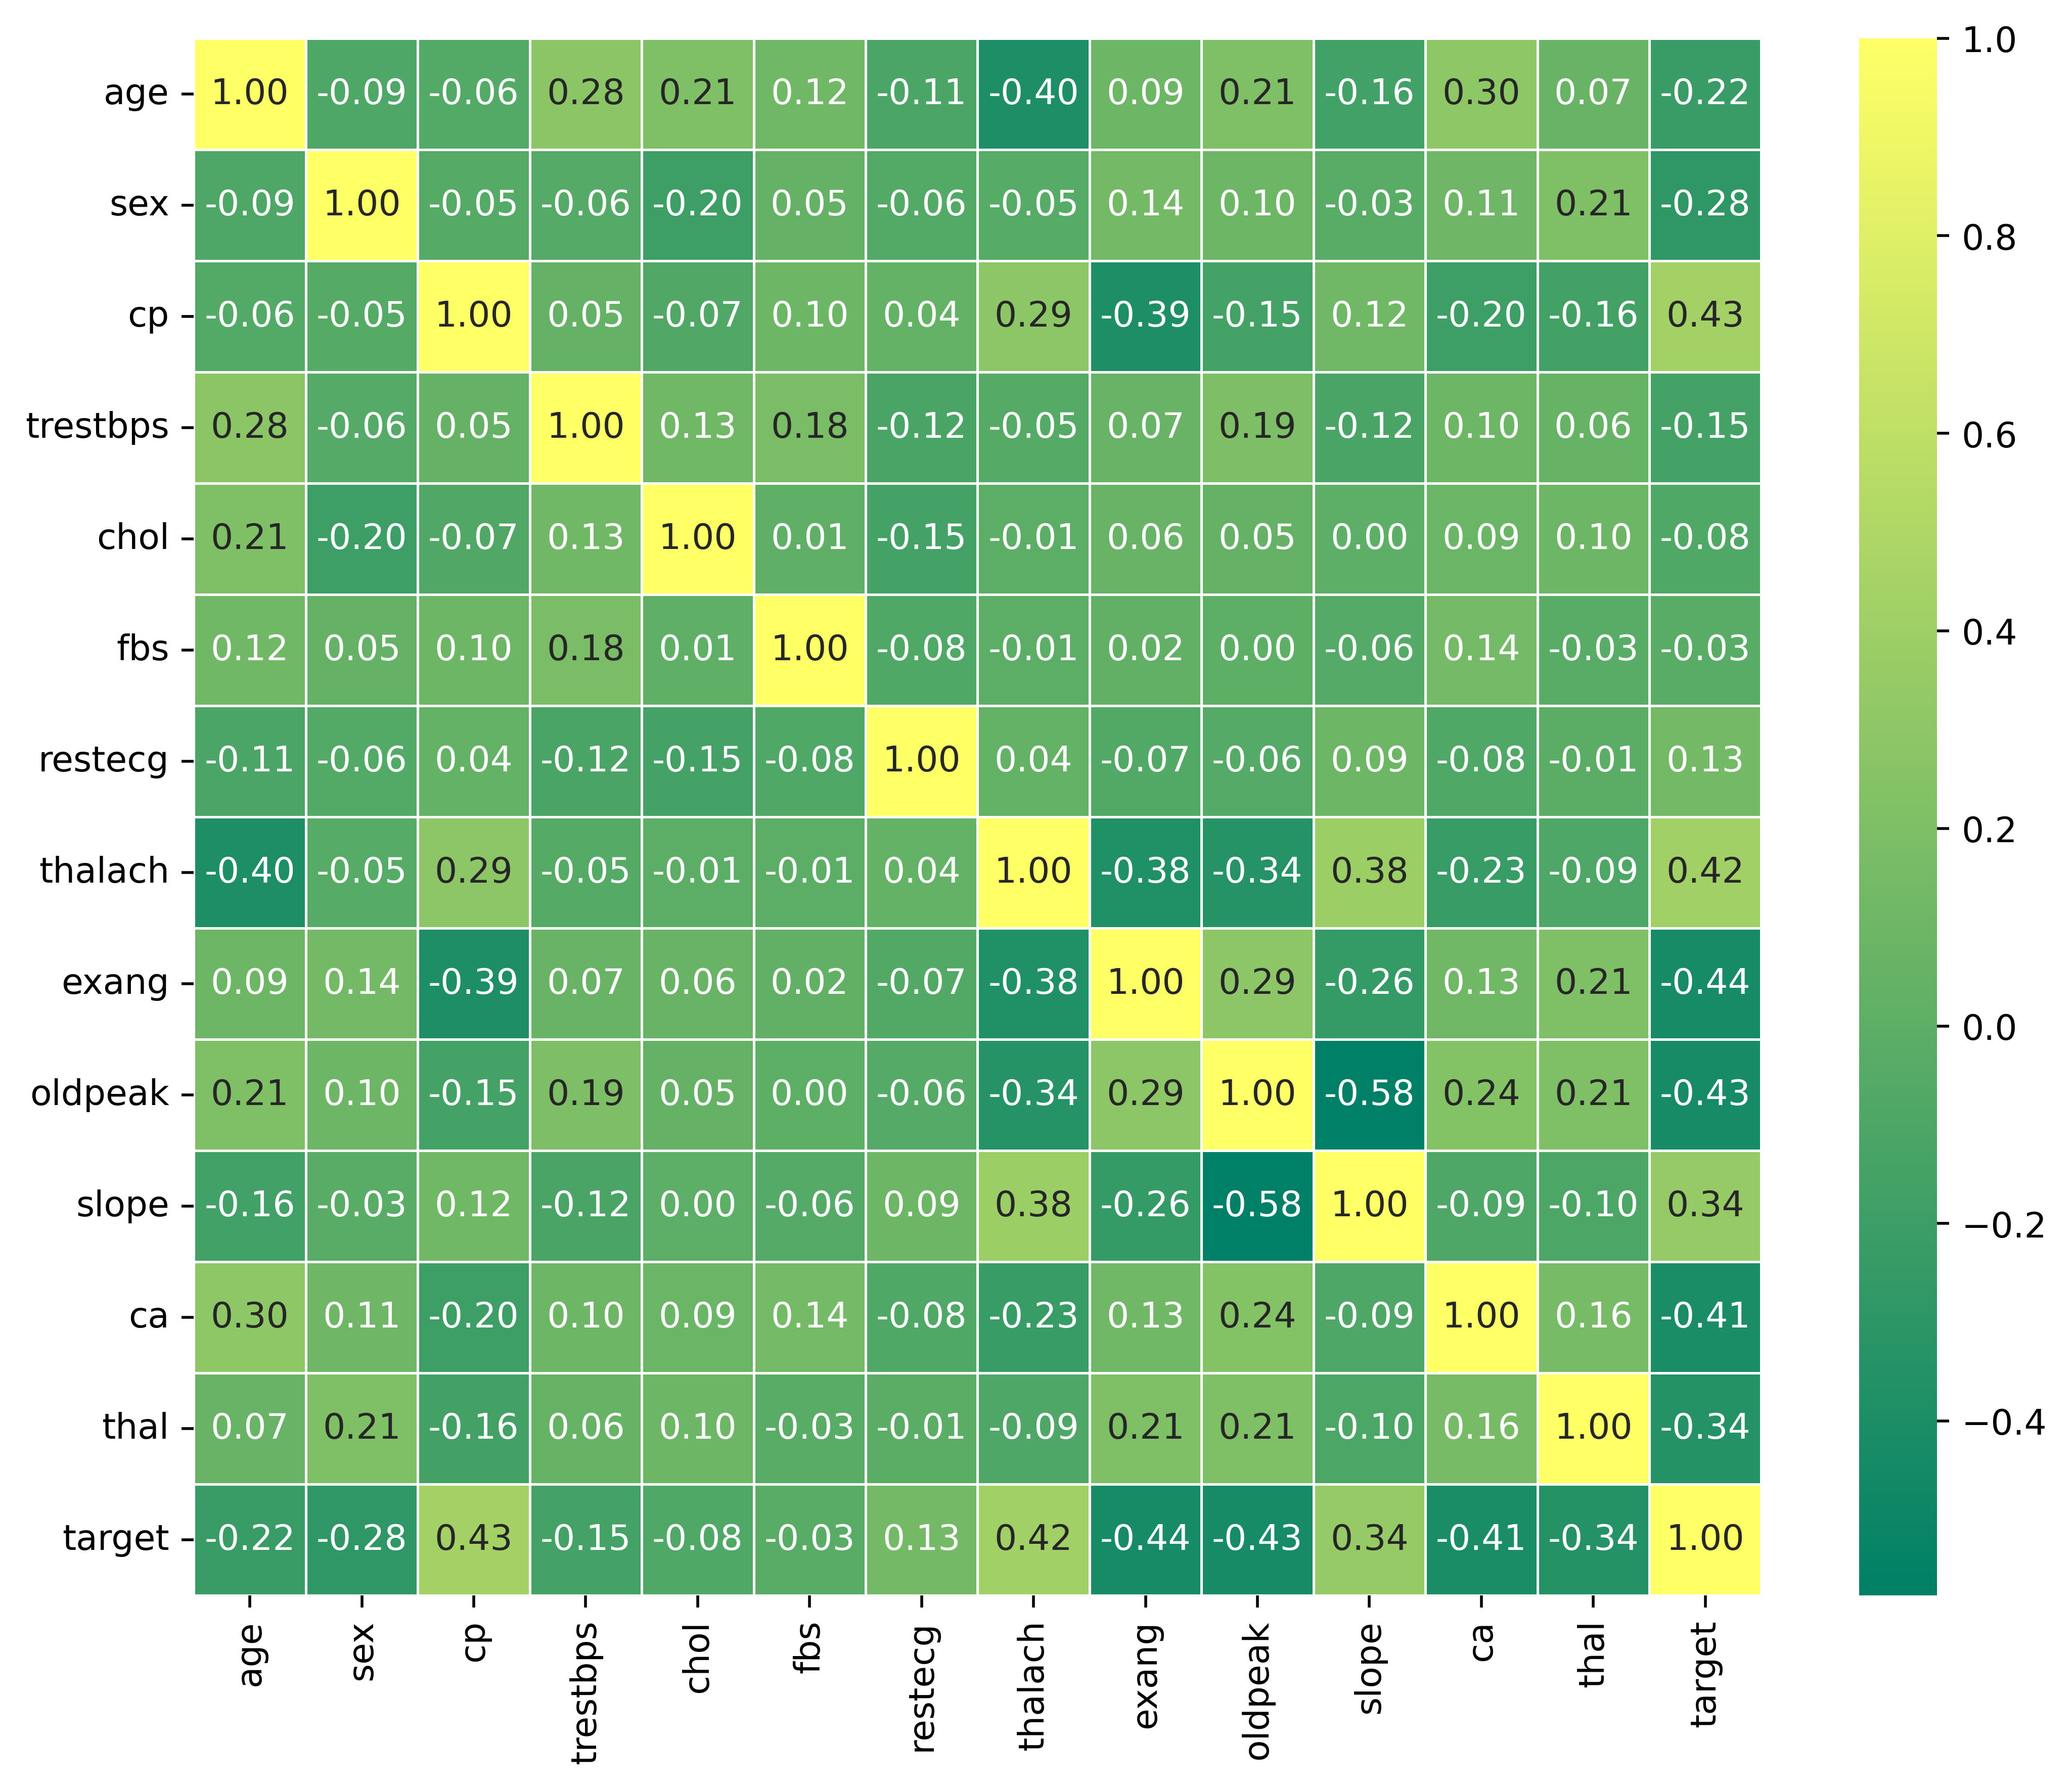

In [365]:
# this function create a correlation matrix 
def Correlation(df):
  corr = df.corr(method = 'pearson')
  #set size
  plt.figure(figsize=(10,8), dpi =500)
  sns.heatmap(corr,cmap = 'summer',annot=True,fmt=".2f", linewidth=.5)
  plt.show()

Correlation(heart_df)

**Classification models**

In [366]:
# create X split and y split
X = heart_df.iloc[:, :-1]
y = heart_df.iloc[:, -1]
# seperating the data with X_train, X_test, y_train, y_test by using train_test_split from sklearn.model_selection
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

 **1) Naive bayes**

In [367]:
# create the first classifier - Naive bayes
def naive_bayes(X_train1,y_train1):
  warnings.filterwarnings("ignore", category=FutureWarning)
  #using GaussianNB from sklearn.naive_bayes
  clf = GaussianNB()
  clf.fit(X_train1, y_train1)
  y_pred = clf.predict(X_test)
  return y_pred

**2) DecisionTreeClassifier**

In [368]:
#create the second classifier - DecisionTreeClassifier
def decisionTreeClassifier(clf_pre,X_train, y_train):
  clf_pre.fit(X_train, y_train)
  #set size
  plt.figure(figsize=(12,8))
  # using plot_tree from sklearn.tree
  plot_tree(clf_pre, filled=True, feature_names=X.columns, class_names=heart1['target'].unique().astype(str))
  plt.show()


**3) KNN**

In [369]:
#create the third classifier - KNN
def KNN(a,b,X_train, y_train,X_test, y_test):
  neighbors = np.arange(a,b) # if b = 20, then neighbors[1,2,3...,18,19]
  train_accuracy =np.empty(len(neighbors))
  test_accuracy = np.empty(len(neighbors))
  #to find the best k from a to b
  max_accuracy = 0
  max_k = None
  max_knn = None
  index = 0

  for i,k in enumerate(neighbors):
    #send to the modle our known k, using KNeighborsClassifier from sklearn.neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    #calculate accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)
    #calculate accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test)
    # find the best k
    if test_accuracy[i] > max_accuracy:
      max_accuracy = test_accuracy[i]
      max_k = k
      max_knn = knn
      index = k

  max_accuracy = np.max(test_accuracy)
  max_accuracy_index = np.argmax(test_accuracy)
  best_k = neighbors[max_accuracy_index]
  #the title of the graph
  plt.title('k-NN Varying number of neighbors')
  plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
  plt.plot(neighbors, train_accuracy, label='Training accuracy')
  plt.legend()
  # name of aixese
  plt.xlabel('Number of neighbors')
  plt.ylabel('Accuracy')
  #display the graph of k = b - 1
  plt.show()
  #list with best k and the knn model that fit to this k
  lst = [max_knn,index]
  return lst

In [376]:
# an help function that display as the graph of the best k
def specific_KNN(lst1):
  neighbors = np.arange(1,lst1[1]) 
  train_accuracy =np.empty(len(neighbors))
  test_accuracy = np.empty(len(neighbors))
  for i,k in enumerate(neighbors):
    #send to the modle our known k, using KNeighborsClassifier from sklearn.neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    #calculate accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)
    #calculate accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test) 
  plt.title('k-NN Varying number of neighbors')
  plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
  plt.plot(neighbors, train_accuracy, label='Training accuracy')
  plt.legend()
  # name of aixese
  plt.xlabel('Number of neighbors')
  plt.ylabel('Accuracy')
  #display the graph of k = b - 1
  plt.show()
  # return knn


**4)K_Means**

In [371]:
#create the fourth classifier - K_Means
def K_Means(K,X1):
  warnings.filterwarnings("ignore", category=FutureWarning)
  # using KMeans from sklearn.cluster
  kmeans = KMeans(n_clusters=K, random_state=0, n_init="auto").fit(X1)
  # labels is the pediction result
  labels = kmeans.labels_
  return labels

In [377]:
#this function activate any modle function and print as the result of accuracy , f_measure, precision, recall
def evaluationMeasures(X_train1, y_train1,X_test1,y_test1):
  print("\033[1m(1)naive_bayes evaluation measures:\033[0m ")
  #activat our naive_bayes
  y_pred_naive_bayes = naive_bayes(X_train1,y_train1)
  #print the evaluation measures
  evaluation_measures(y_test1, y_pred_naive_bayes)

  print("-----------------------------------------------------------")
  print("\033[1m(2)KNN evaluation measures:\033[0m ")
  #activat our KNN
  knn = KNN(1,20,X_train1, y_train1,X_test1, y_test1)
  print("From the graph above, if we look at its acurrency values for each k from 1 to 20 (not include),")
  print( "we will find that k = " +knn[1].astype(str)+" gives the best result, therefore we will present the graph for k")
  #activate our help knn function
  specific_KNN(knn)
  y_pred_knn = knn[0].predict(X_test)
  #print the evaluation measures
  evaluation_measures(y_test1, y_pred_knn)

  print("------------------------------------------------------------")
  print("\033[1m(3)DecisionTreeClassifier evaluation measures:\033[0m ")
  print("********Start D1 : criterion='entropy',max_depth=2 ********")
  # using DecisionTreeClassifier from sklearn.neighbors
  clf_pre = DecisionTreeClassifier(criterion='entropy',max_depth=2)
  #activat our decisionTreeClassifier
  decisionTreeClassifier(clf_pre,X_train1, y_train1)
  y_pred_pre = clf_pre.predict(X_test1)
  #print the evaluation measures
  evaluation_measures(y_test1, y_pred_pre)


  print("********END D1********")
  print()
  print("********START D2 - criterion='entropy',max_depth=3 ********")
  # using DecisionTreeClassifier from sklearn.neighbors
  clf_pre1 = DecisionTreeClassifier(criterion='entropy',max_depth=3)
  #activat our decisionTreeClassifier
  decisionTreeClassifier(clf_pre1,X_train1, y_train1)
  y_pred_pre = clf_pre.predict(X_test1)
  #print the evaluation measures
  evaluation_measures(y_test1, y_pred_pre)


  print("********END D2********")
  print()
  print("START D3 - criterion='gini',max_depth=3")
  # using DecisionTreeClassifier from sklearn.neighbors
  clf_pre2 = DecisionTreeClassifier(criterion='gini',max_depth=3)
  #activat our decisionTreeClassifier
  decisionTreeClassifier(clf_pre2,X_train1, y_train1)
  y_pred_pre = clf_pre.predict(X_test1)
  #print the evaluation measures
  evaluation_measures(y_test1, y_pred_pre)

  print("********END D3********")
  print()
  print("------------------------------------------------------------")
  print("\033[1m(4)K-means measures:\033[0m ")
  #activate our K_Means
  labels= K_Means(2,X)
  true_labels = y 
  #print the evaluation measures
  evaluation_measures(true_labels, labels)
  #return a list of the y preidict of any modle, we need it to display the cm of any modle 
  print("------------------------------------------------------------")
  return [y_pred_naive_bayes,y_pred_knn,y_pred_pre,labels]

# evaluationMeasures(X_train, y_train,X_test,y_test)

In [373]:
#this function display the matrixes of our modles
def AllMatrix(y_test1,lst,y1):
  print("confusionMatrix results:")
  print("\033[1mnaive_bayes bMatrix :\033[0m ")
  #confusionMatrix of naive_bayes
  confusionMatrix(y_test1, lst[0],"naive_bayes")
  # print("TN = {0}, TP = {1}, FN = {2}, FP = {3}".format(cm[0,0],cm[1,1],cm[1,0],cm[0,1]))
  print("\033[1mKNN bMatrix :\033[0m ")
  #confusionMatrix of KNN
  confusionMatrix(y_test1, lst[1],"KNN")
  print("\033[1mDecisionTreeClassifier bMatrix :\033[0m ")
  #confusionMatrix of DecisionTreeClassifier
  confusionMatrix(y_test1, lst[2],"DecisionTreeClassifier")
  print("\033[1mK-means bMatrix :\033[0m ")
  # print(lst[3])
  #confusionMatrix of means
  confusionMatrix(y1, lst[3],"k-means")
  # confusionMatrix(y1, lst[3],"k-means")
  # print(lst[3])


# AllMatrix(y_test,lst,y)


**running**

(1)naive_bayes evaluation measures: 
Accuracy: 0.819672131147541
F-measure: 0.8358208955223881
Precision: 0.8
Recall: 0.875
-----------------------------------------------------------
(2)KNN evaluation measures: 


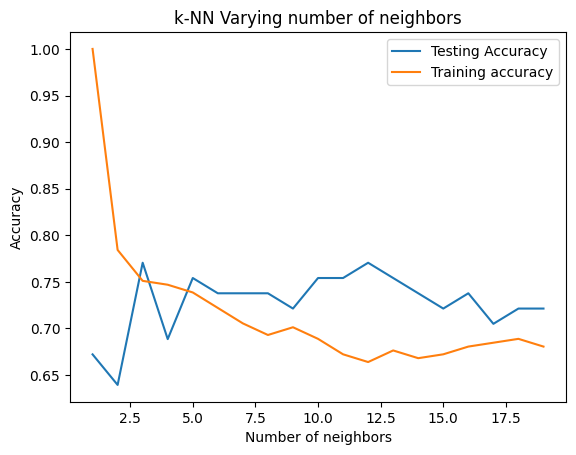

From the graph above, if we look at its acurrency values for each k from 1 to 20 (not include),
we will find that k = 3 gives the best result, therefore we will present the graph for k


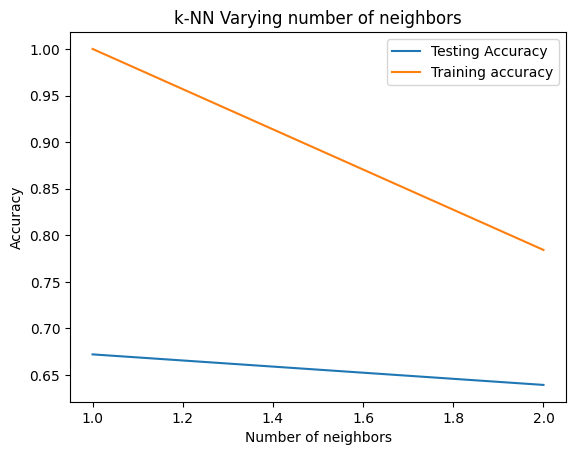

Accuracy: 0.7704918032786885
F-measure: 0.787878787878788
Precision: 0.7647058823529411
Recall: 0.8125
------------------------------------------------------------
(3)DecisionTreeClassifier evaluation measures: 
********Start D1 : criterion='entropy',max_depth=2 ********


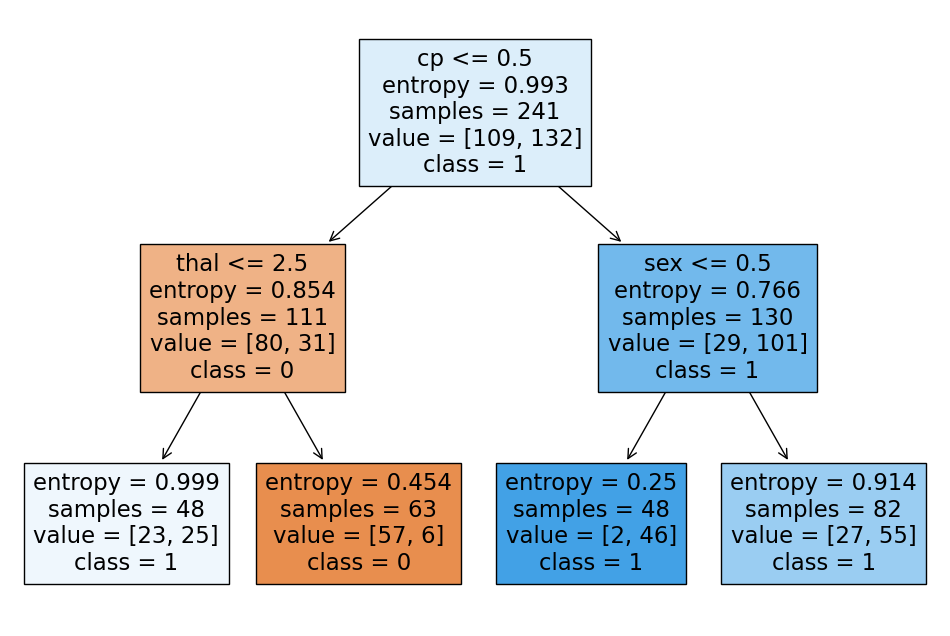

Accuracy: 0.7377049180327869
F-measure: 0.7948717948717949
Precision: 0.6739130434782609
Recall: 0.96875
********END D1********

********START D2 - criterion='entropy',max_depth=3 ********


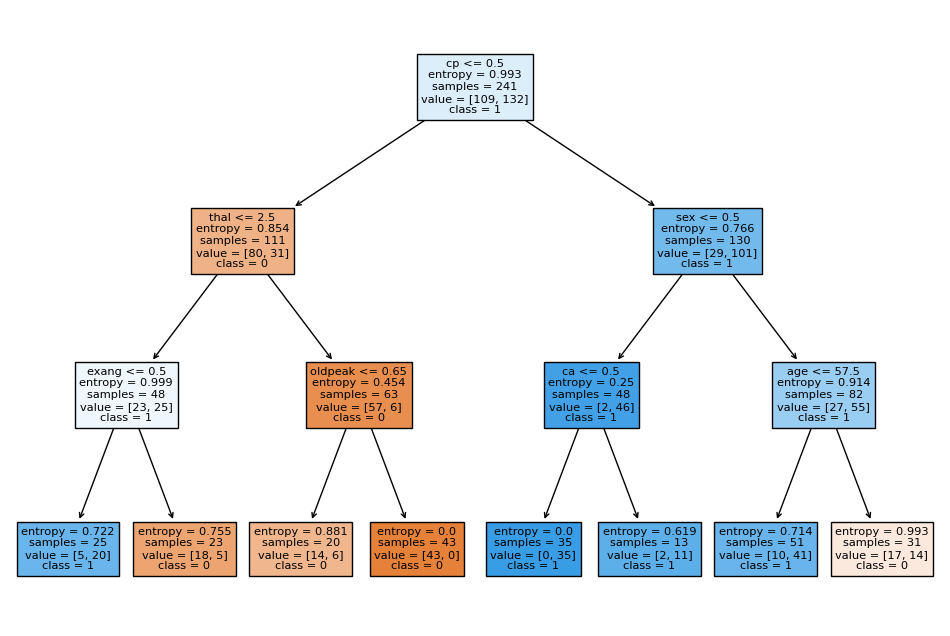

Accuracy: 0.7377049180327869
F-measure: 0.7948717948717949
Precision: 0.6739130434782609
Recall: 0.96875
********END D2********

START D3 - criterion='gini',max_depth=3


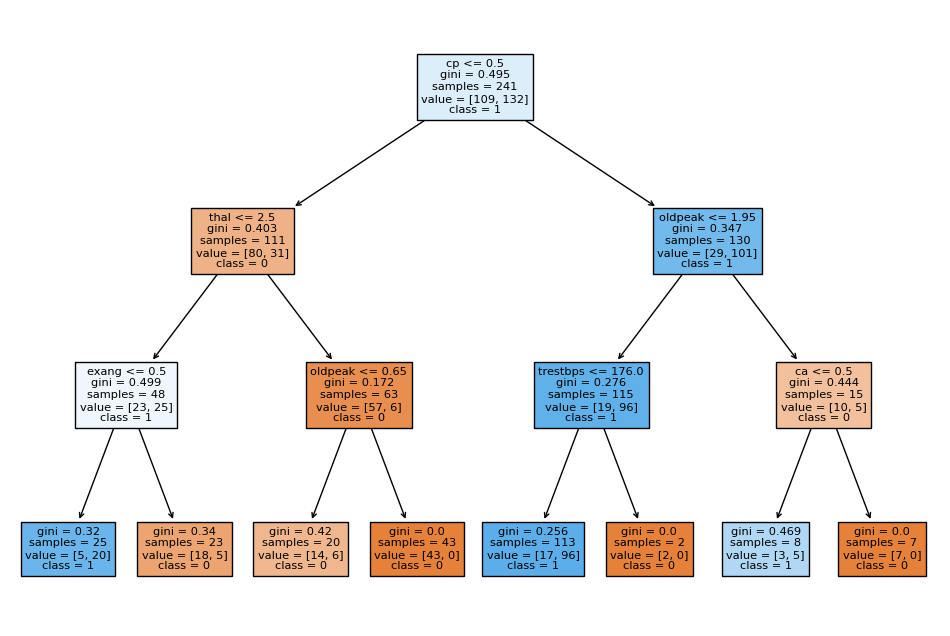

Accuracy: 0.7377049180327869
F-measure: 0.7948717948717949
Precision: 0.6739130434782609
Recall: 0.96875
********END D3********

------------------------------------------------------------
(4)K-means measures: 
Accuracy: 0.423841059602649
F-measure: 0.36496350364963503
Precision: 0.45454545454545453
Recall: 0.3048780487804878
------------------------------------------------------------
confusionMatrix results:
naive_bayes bMatrix : 
TN = 22
TP = 28
FN = 4
FP = 7
KNN bMatrix : 
TN = 21
TP = 26
FN = 6
FP = 8
DecisionTreeClassifier bMatrix : 
TN = 14
TP = 31
FN = 1
FP = 15
K-means bMatrix : 
TN = 78
TP = 50
FN = 114
FP = 60


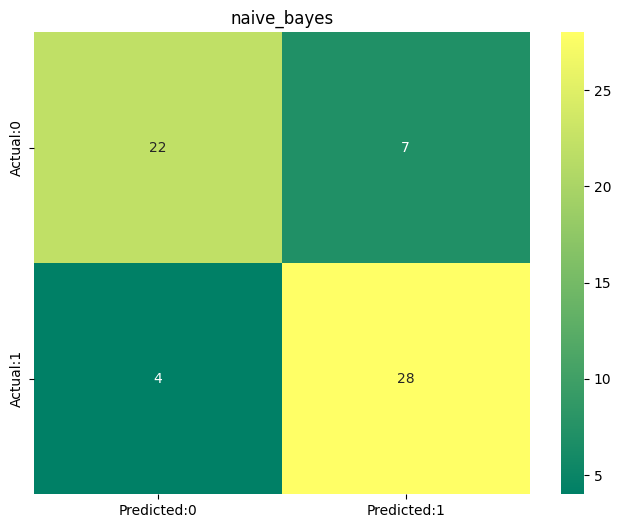

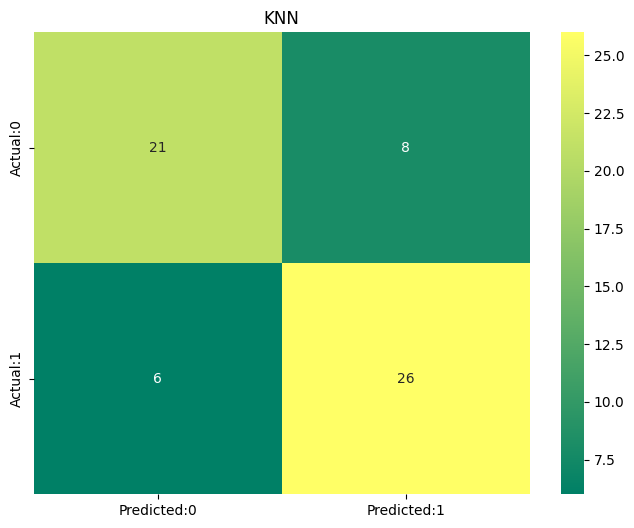

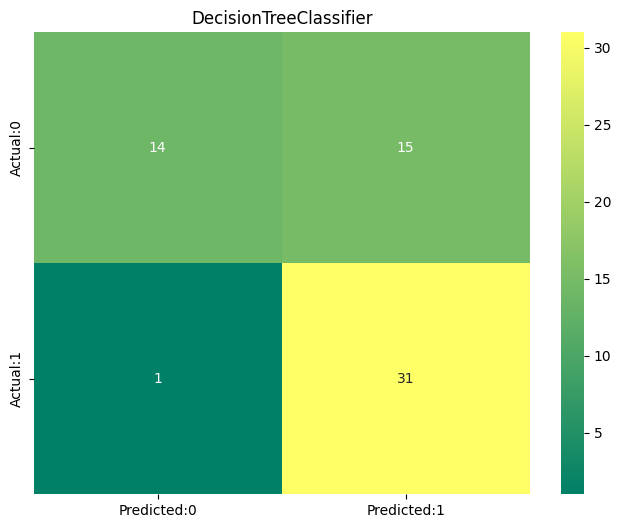

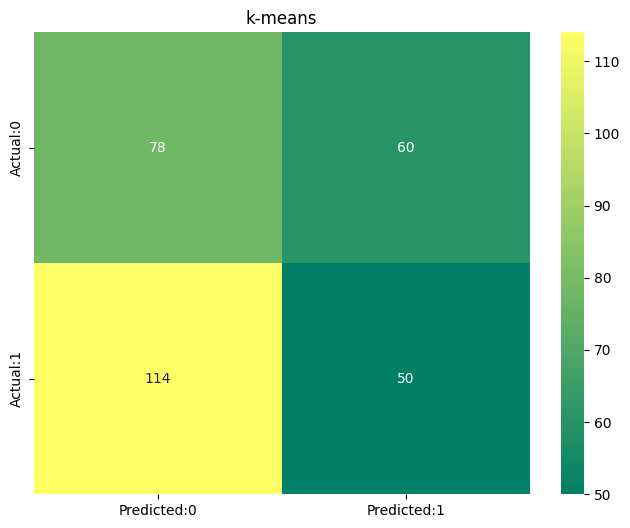

In [325]:
run1 = heart_df.copy()
run1 = run1.drop(columns='slope')
run1 = big_bin_boundaries(run1,'chol',100)

# create X split and y split
X = run1.iloc[:, :-1]
y = run1.iloc[:, -1]
# seperating the data with X_train, X_test, y_train, y_test by using train_test_split from sklearn.model_selection
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
lst=evaluationMeasures(X_train, y_train,X_test,y_test)
AllMatrix(y_test,lst,y)



(1)naive_bayes evaluation measures: 
Accuracy: 0.819672131147541
F-measure: 0.8307692307692308
Precision: 0.8181818181818182
Recall: 0.84375
-----------------------------------------------------------
(2)KNN evaluation measures: 


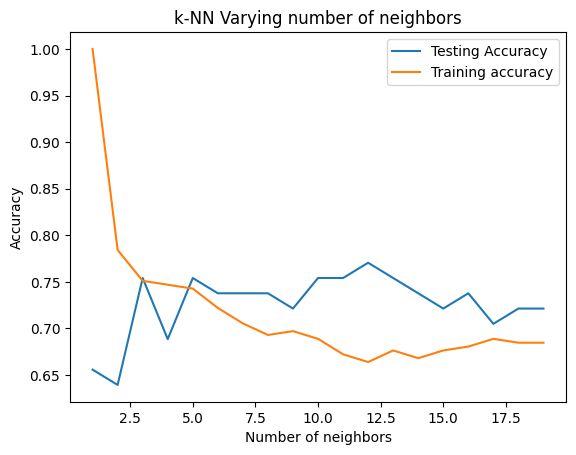

From the graph above, if we look at its acurrency values for each k from 1 to 20 (not include),
we will find that k = 12 gives the best result, therefore we will present the graph for k


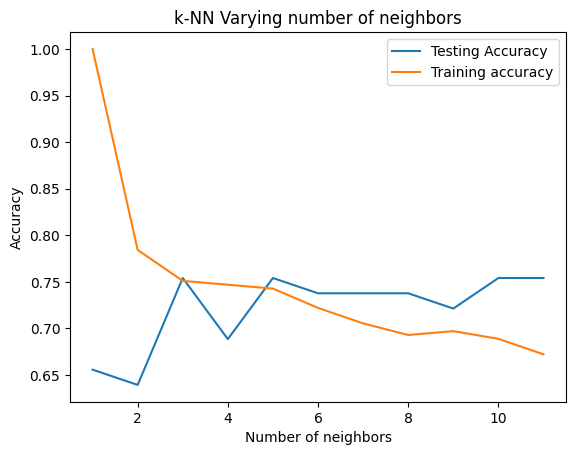

Accuracy: 0.7704918032786885
F-measure: 0.7999999999999999
Precision: 0.7368421052631579
Recall: 0.875
------------------------------------------------------------
(3)DecisionTreeClassifier evaluation measures: 
********Start D1 : criterion='entropy',max_depth=2 ********


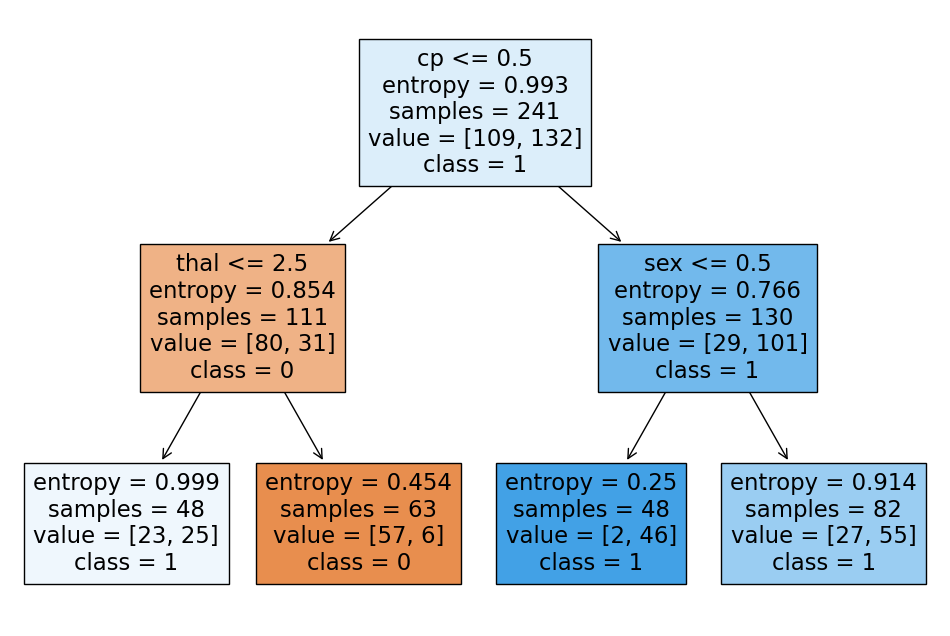

Accuracy: 0.7377049180327869
F-measure: 0.7948717948717949
Precision: 0.6739130434782609
Recall: 0.96875
********END D1********

********START D2 - criterion='entropy',max_depth=3 ********


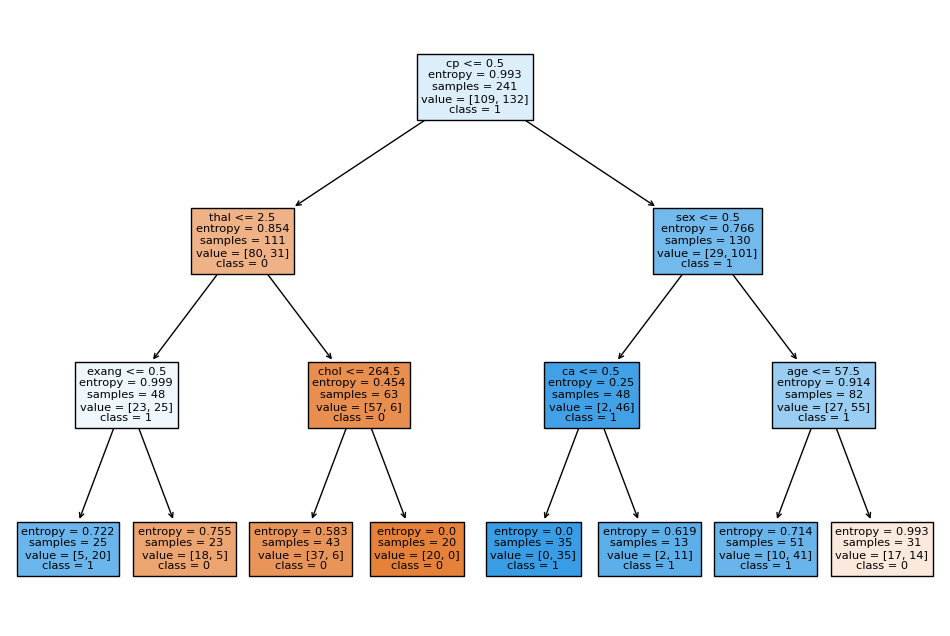

Accuracy: 0.7377049180327869
F-measure: 0.7948717948717949
Precision: 0.6739130434782609
Recall: 0.96875
********END D2********

START D3 - criterion='gini',max_depth=3


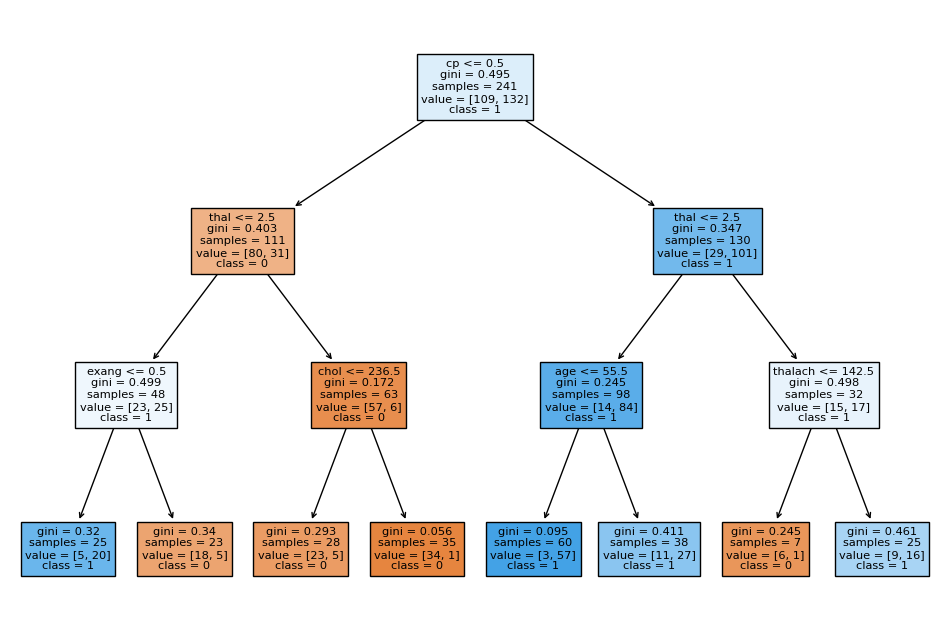

Accuracy: 0.7377049180327869
F-measure: 0.7948717948717949
Precision: 0.6739130434782609
Recall: 0.96875
********END D3********

------------------------------------------------------------
(4)K-means measures: 
Accuracy: 0.423841059602649
F-measure: 0.36496350364963503
Precision: 0.45454545454545453
Recall: 0.3048780487804878
------------------------------------------------------------
confusionMatrix results:
naive_bayes bMatrix : 
TN = 23
TP = 27
FN = 5
FP = 6
KNN bMatrix : 
TN = 19
TP = 28
FN = 4
FP = 10
DecisionTreeClassifier bMatrix : 
TN = 14
TP = 31
FN = 1
FP = 15
K-means bMatrix : 
TN = 78
TP = 50
FN = 114
FP = 60


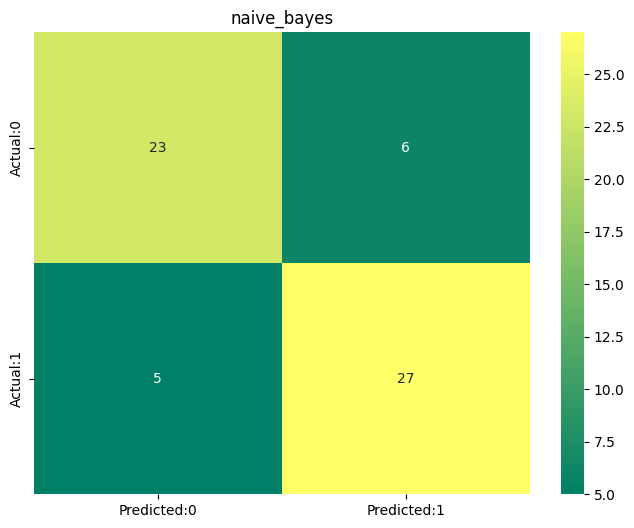

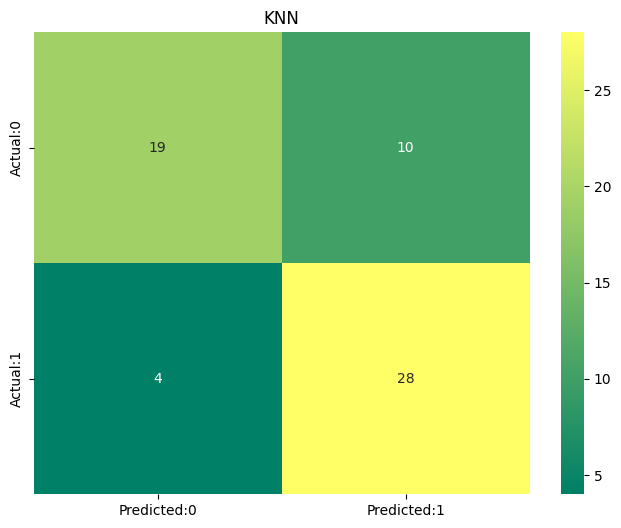

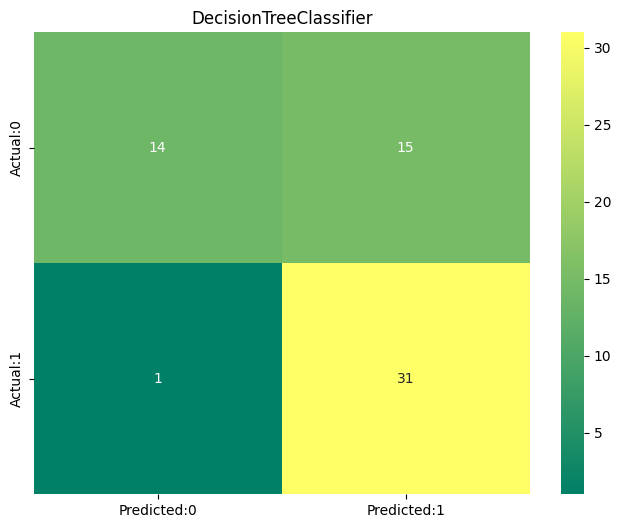

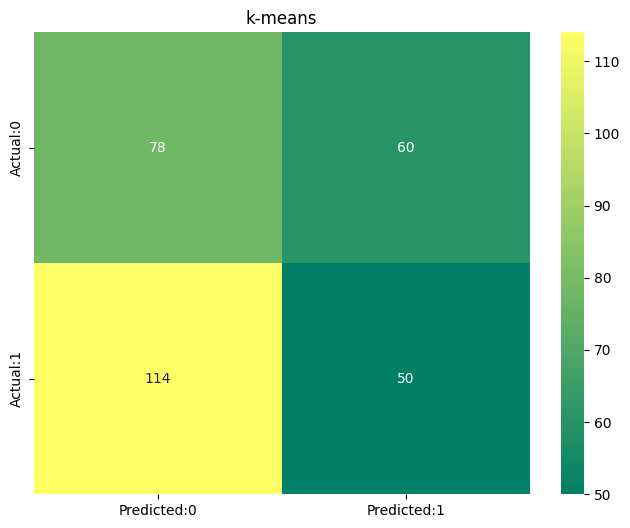

In [335]:
run2 = heart_df.copy()
run2 = run2.drop(columns='oldpeak')
run2 = big_bin_boundaries(run2,'chol',100)

# create X split and y split
X = run2.iloc[:, :-1]
y = run2.iloc[:, -1]
# seperating the data with X_train, X_test, y_train, y_test by using train_test_split from sklearn.model_selection
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
lst=evaluationMeasures(X_train, y_train,X_test,y_test)
AllMatrix(y_test,lst,y)

(1)naive_bayes evaluation measures: 
Accuracy: 0.819672131147541
F-measure: 0.8307692307692308
Precision: 0.8181818181818182
Recall: 0.84375
-----------------------------------------------------------
(2)KNN evaluation measures: 


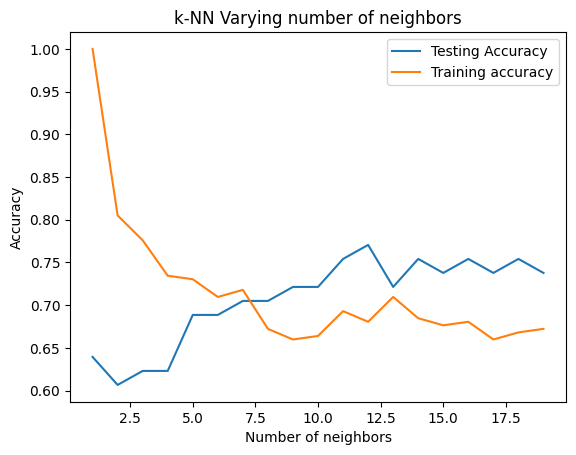

From the graph above, if we look at its acurrency values for each k from 1 to 20 (not include),
we will find that k = 12 gives the best result, therefore we will present the graph for k


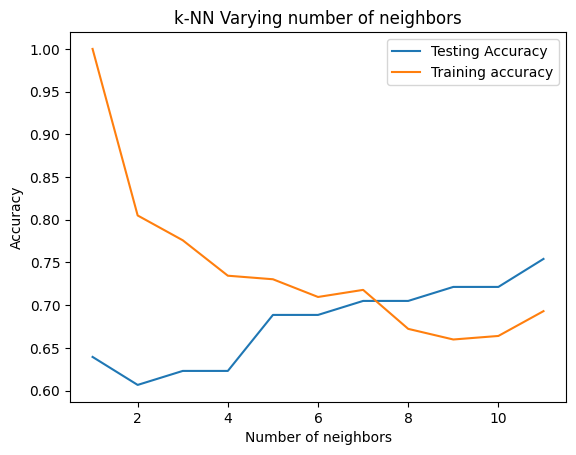

Accuracy: 0.7704918032786885
F-measure: 0.787878787878788
Precision: 0.7647058823529411
Recall: 0.8125
------------------------------------------------------------
(3)DecisionTreeClassifier evaluation measures: 
********Start D1 : criterion='entropy',max_depth=2 ********


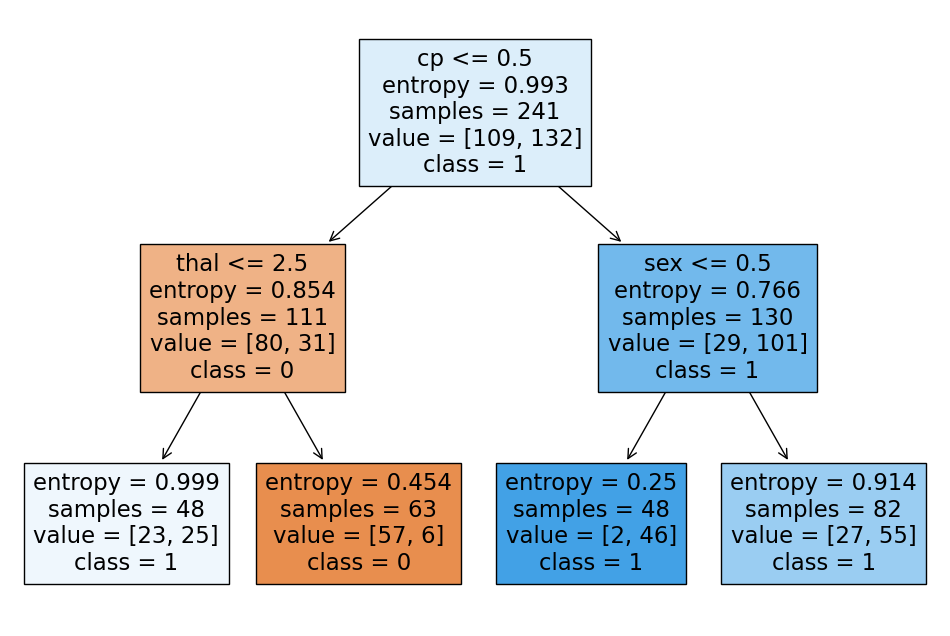

Accuracy: 0.7377049180327869
F-measure: 0.7948717948717949
Precision: 0.6739130434782609
Recall: 0.96875
********END D1********

********START D2 - criterion='entropy',max_depth=3 ********


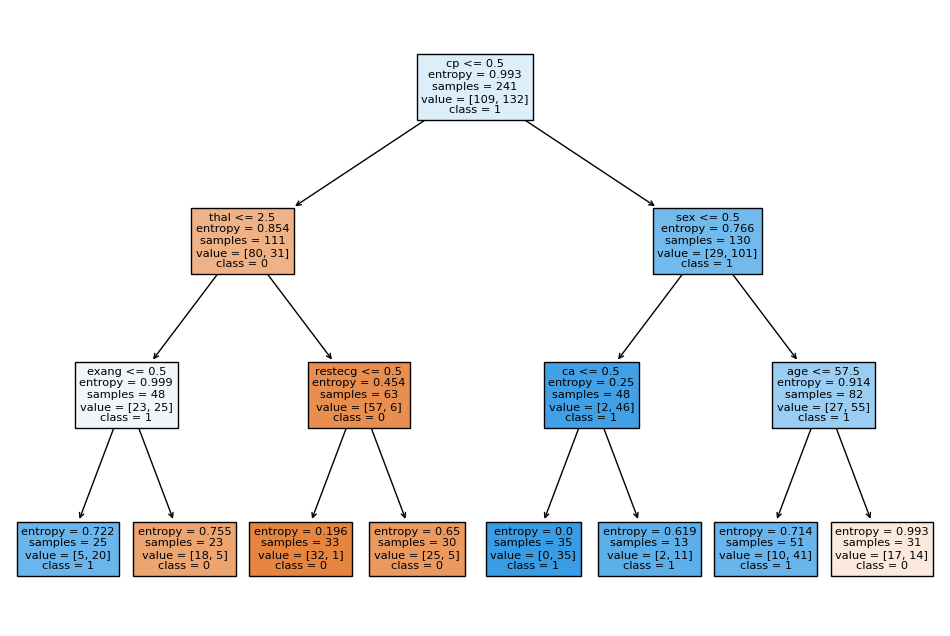

Accuracy: 0.7377049180327869
F-measure: 0.7948717948717949
Precision: 0.6739130434782609
Recall: 0.96875
********END D2********

START D3 - criterion='gini',max_depth=3


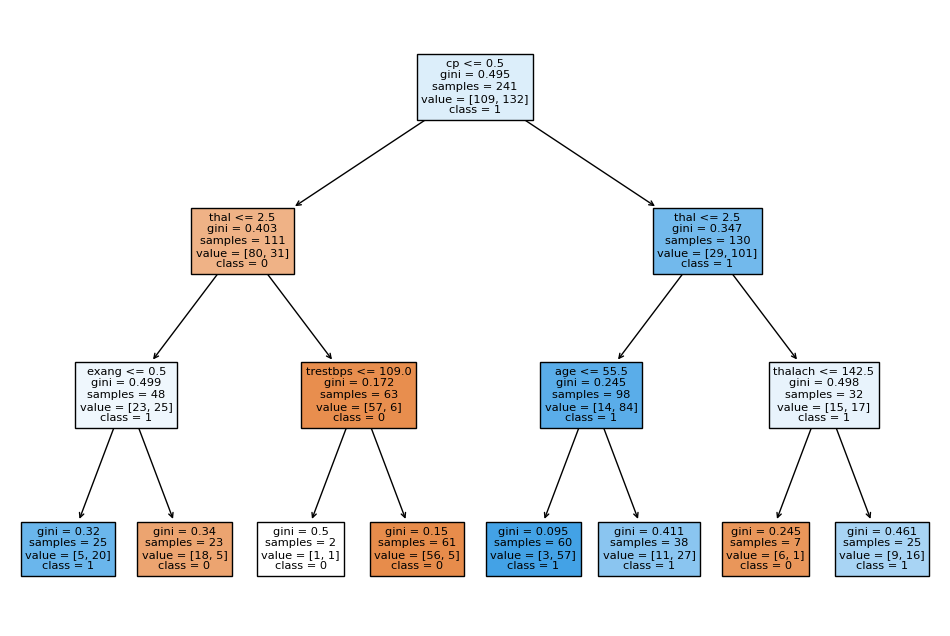

Accuracy: 0.7377049180327869
F-measure: 0.7948717948717949
Precision: 0.6739130434782609
Recall: 0.96875
********END D3********

------------------------------------------------------------
(4)K-means measures: 
Accuracy: 0.5662251655629139
F-measure: 0.586750788643533
Precision: 0.6078431372549019
Recall: 0.5670731707317073
------------------------------------------------------------
confusionMatrix results:
naive_bayes bMatrix : 
TN = 23
TP = 27
FN = 5
FP = 6
KNN bMatrix : 
TN = 21
TP = 26
FN = 6
FP = 8
DecisionTreeClassifier bMatrix : 
TN = 14
TP = 31
FN = 1
FP = 15
K-means bMatrix : 
TN = 78
TP = 93
FN = 71
FP = 60


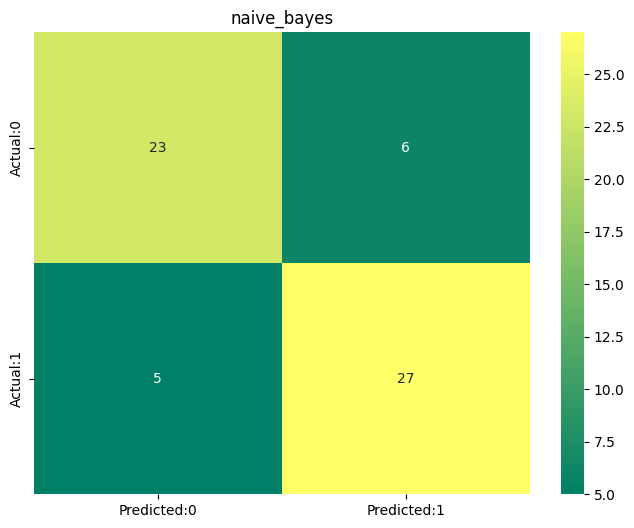

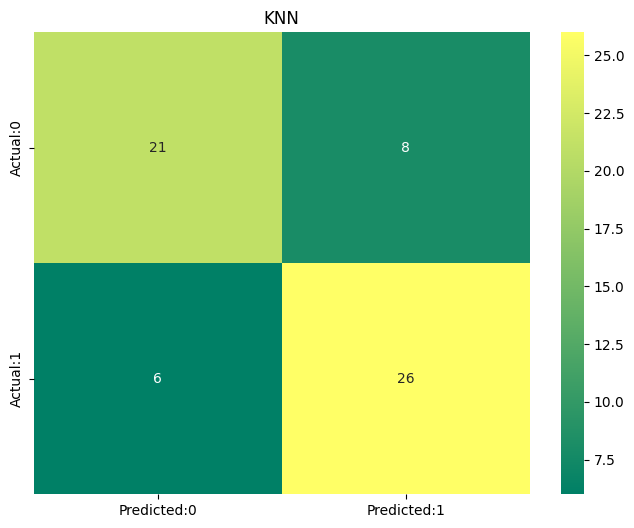

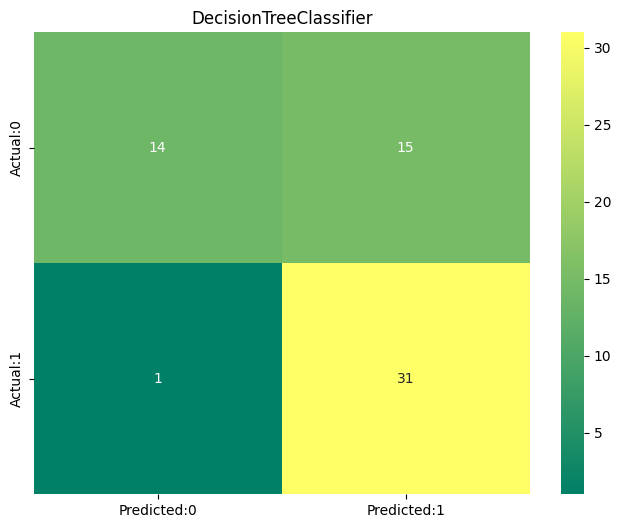

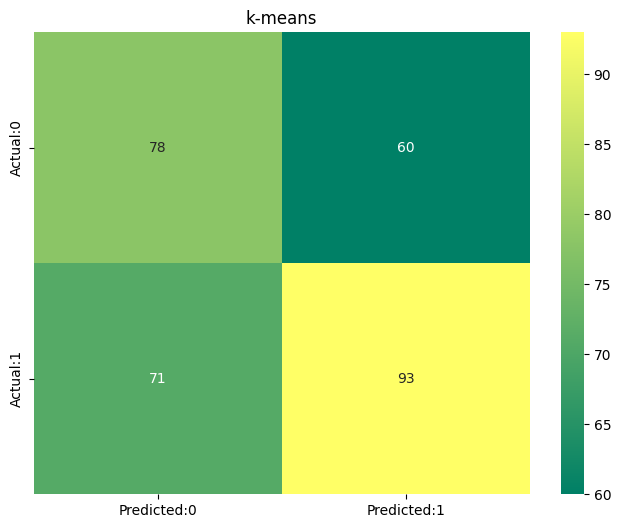

In [336]:
run3 = heart_df.copy()
run3 = run3.drop(columns='oldpeak')
run3 = big_bin_boundaries(run3,'chol',3)

# create X split and y split
X = run3.iloc[:, :-1]
y = run3.iloc[:, -1]
# seperating the data with X_train, X_test, y_train, y_test by using train_test_split from sklearn.model_selection
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
lst=evaluationMeasures(X_train, y_train,X_test,y_test)
AllMatrix(y_test,lst,y)

(1)naive_bayes evaluation measures: 
Accuracy: 0.7868852459016393
F-measure: 0.8059701492537314
Precision: 0.7714285714285715
Recall: 0.84375
-----------------------------------------------------------
(2)KNN evaluation measures: 


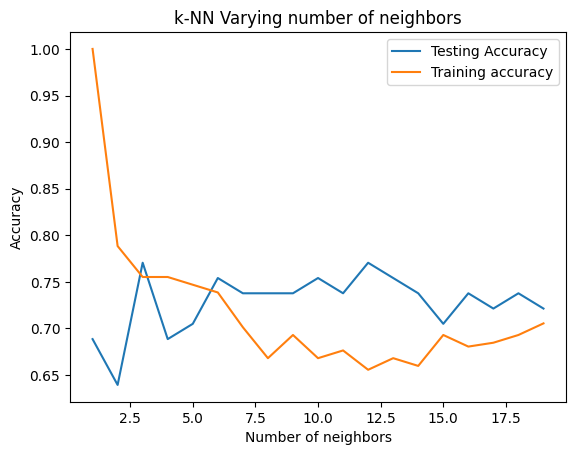

From the graph above, if we look at its acurrency values for each k from 1 to 20 (not include),
we will find that k = 3 gives the best result, therefore we will present the graph for k


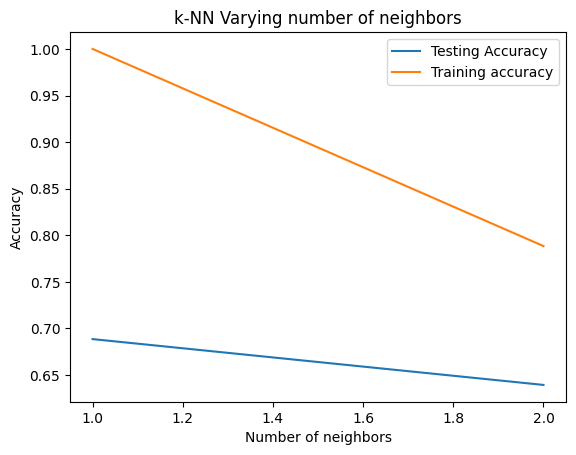

Accuracy: 0.7704918032786885
F-measure: 0.787878787878788
Precision: 0.7647058823529411
Recall: 0.8125
------------------------------------------------------------
(3)DecisionTreeClassifier evaluation measures: 
********Start D1 : criterion='entropy',max_depth=2 ********


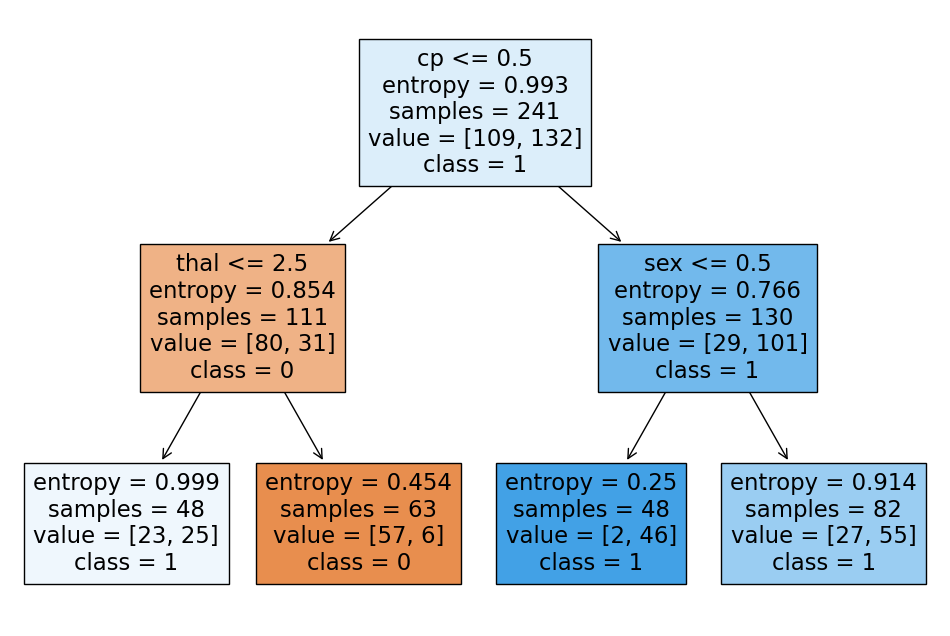

Accuracy: 0.7377049180327869
F-measure: 0.7948717948717949
Precision: 0.6739130434782609
Recall: 0.96875
********END D1********

********START D2 - criterion='entropy',max_depth=3 ********


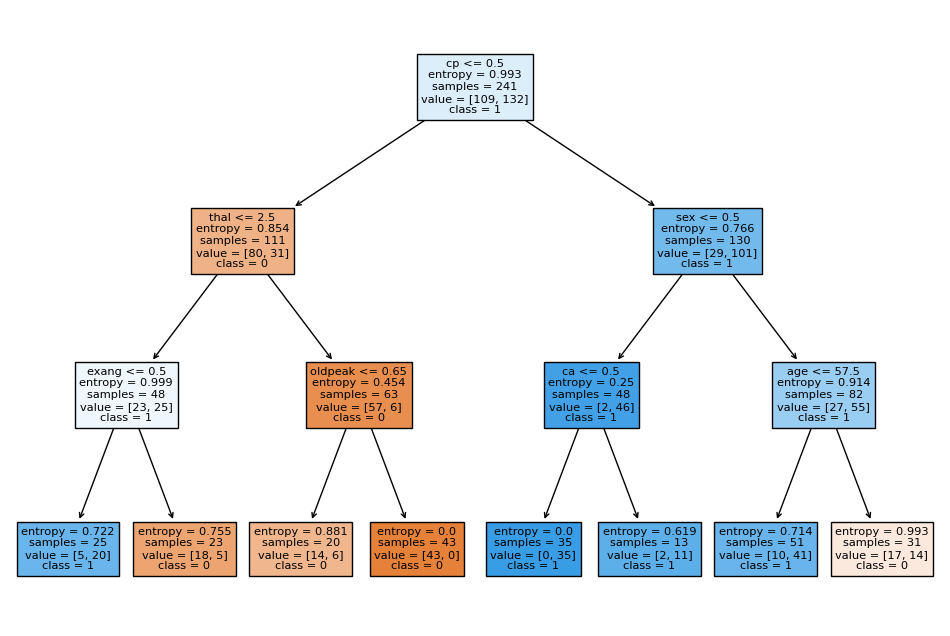

Accuracy: 0.7377049180327869
F-measure: 0.7948717948717949
Precision: 0.6739130434782609
Recall: 0.96875
********END D2********

START D3 - criterion='gini',max_depth=3


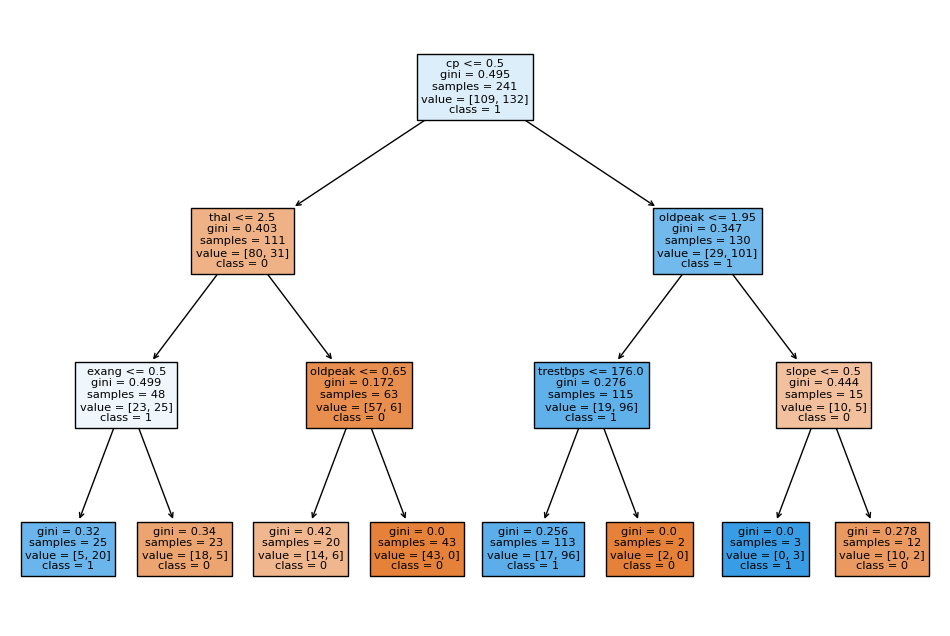

Accuracy: 0.7377049180327869
F-measure: 0.7948717948717949
Precision: 0.6739130434782609
Recall: 0.96875
********END D3********

------------------------------------------------------------
(4)K-means measures: 
Accuracy: 0.423841059602649
F-measure: 0.36496350364963503
Precision: 0.45454545454545453
Recall: 0.3048780487804878
------------------------------------------------------------
confusionMatrix results:
naive_bayes bMatrix : 
TN = 21
TP = 27
FN = 5
FP = 8
KNN bMatrix : 
TN = 21
TP = 26
FN = 6
FP = 8
DecisionTreeClassifier bMatrix : 
TN = 14
TP = 31
FN = 1
FP = 15
K-means bMatrix : 
TN = 78
TP = 50
FN = 114
FP = 60


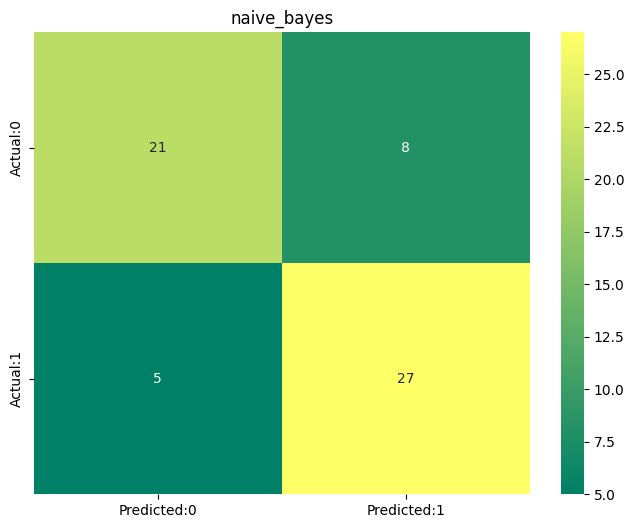

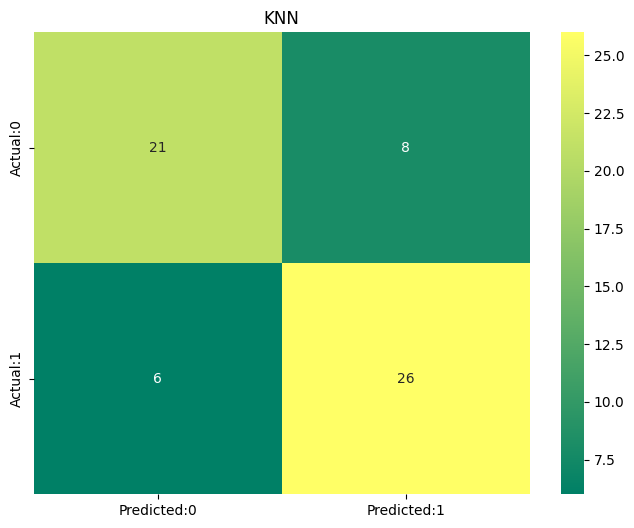

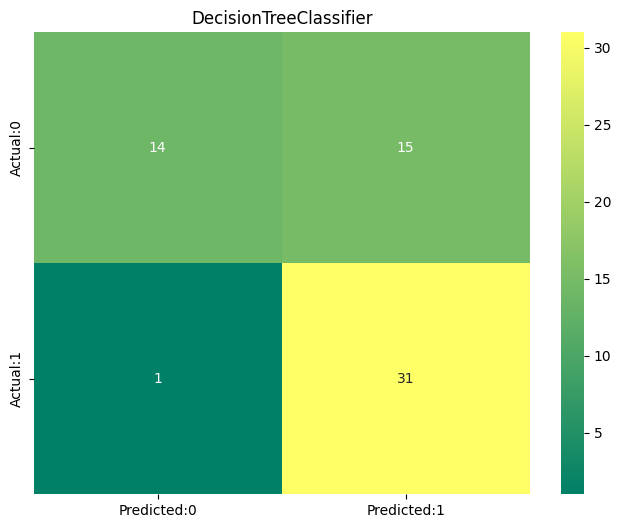

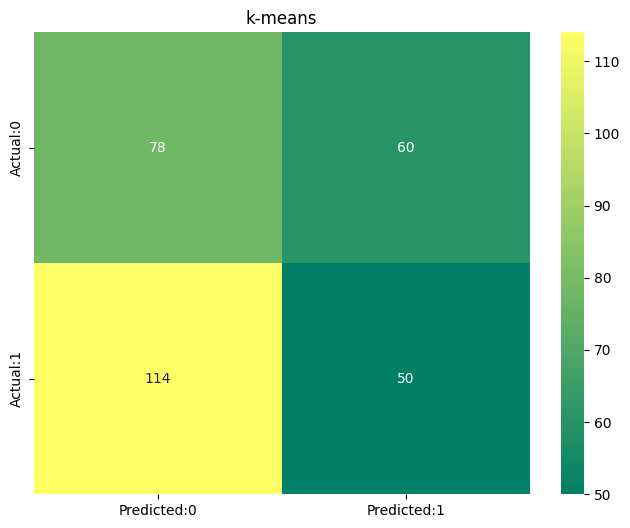

In [337]:
run4 = heart_df.copy()
run4 = run4.drop(columns='slope')
run4 = big_bin_mean(run3,'chol',150)

# create X split and y split
X = run4.iloc[:, :-1]
y = run4.iloc[:, -1]
# seperating the data with X_train, X_test, y_train, y_test by using train_test_split from sklearn.model_selection
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
lst=evaluationMeasures(X_train, y_train,X_test,y_test)
AllMatrix(y_test,lst,y)

202
(1)naive_bayes evaluation measures: 
Accuracy: 0.8360655737704918
F-measure: 0.8387096774193549
Precision: 0.7878787878787878
Recall: 0.896551724137931
-----------------------------------------------------------
(2)KNN evaluation measures: 


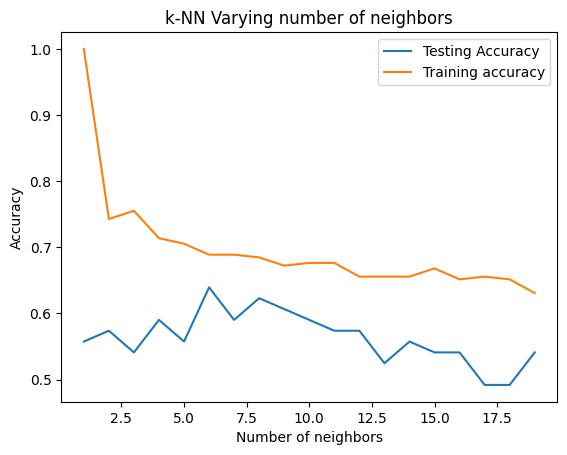

From the graph above, if we look at its acurrency values for each k from 1 to 20 (not include),
we will find that k = 6 gives the best result, therefore we will present the graph for k


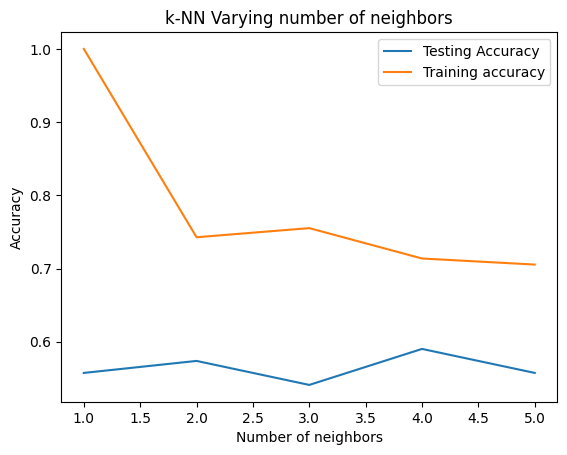

Accuracy: 0.639344262295082
F-measure: 0.6206896551724138
Precision: 0.6206896551724138
Recall: 0.6206896551724138
------------------------------------------------------------
(3)DecisionTreeClassifier evaluation measures: 
********Start D1 : criterion='entropy',max_depth=2 ********


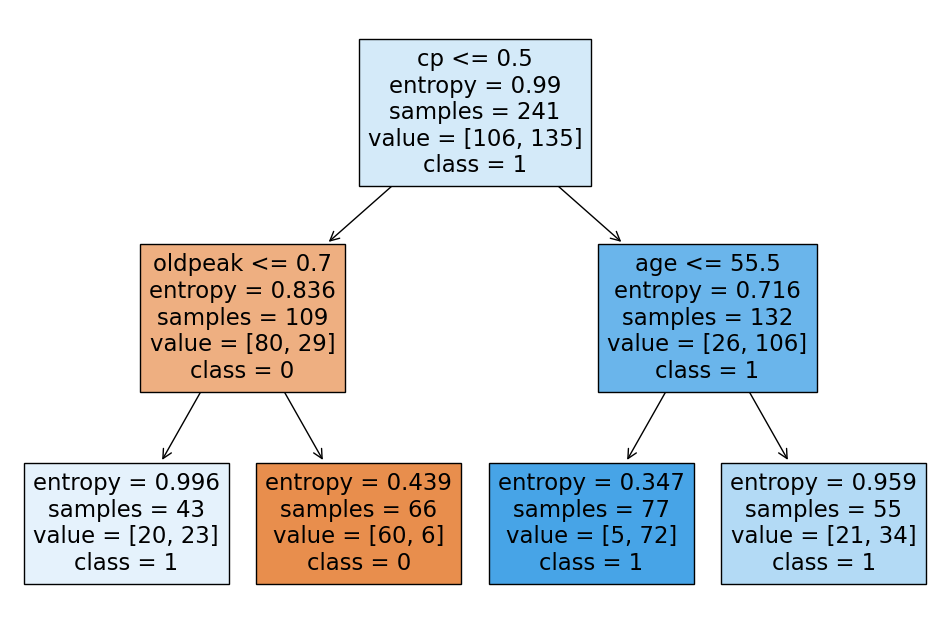

Accuracy: 0.7049180327868853
F-measure: 0.7272727272727273
Precision: 0.6486486486486487
Recall: 0.8275862068965517
********END D1********

********START D2 - criterion='entropy',max_depth=3 ********


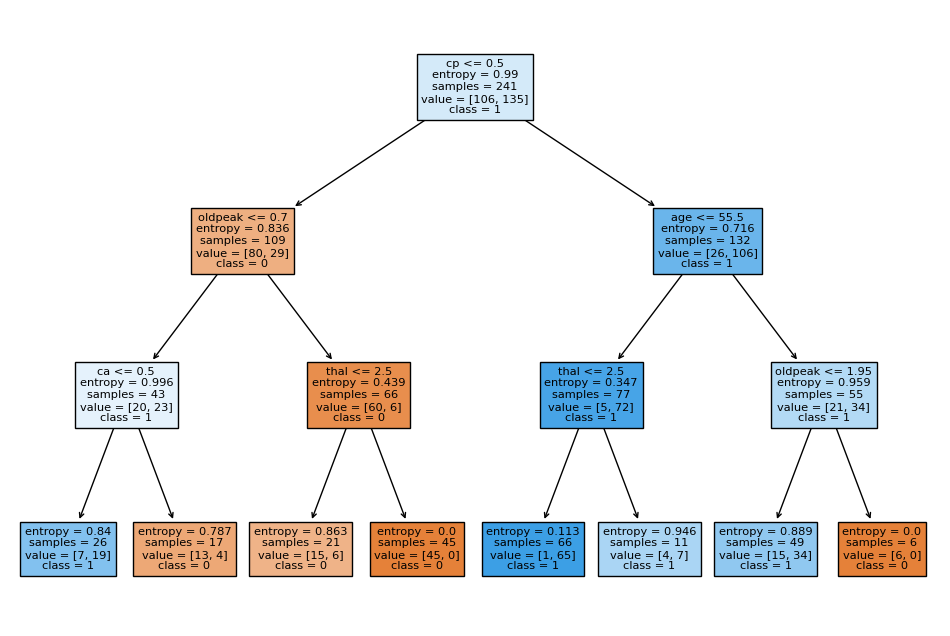

Accuracy: 0.7049180327868853
F-measure: 0.7272727272727273
Precision: 0.6486486486486487
Recall: 0.8275862068965517
********END D2********

START D3 - criterion='gini',max_depth=3


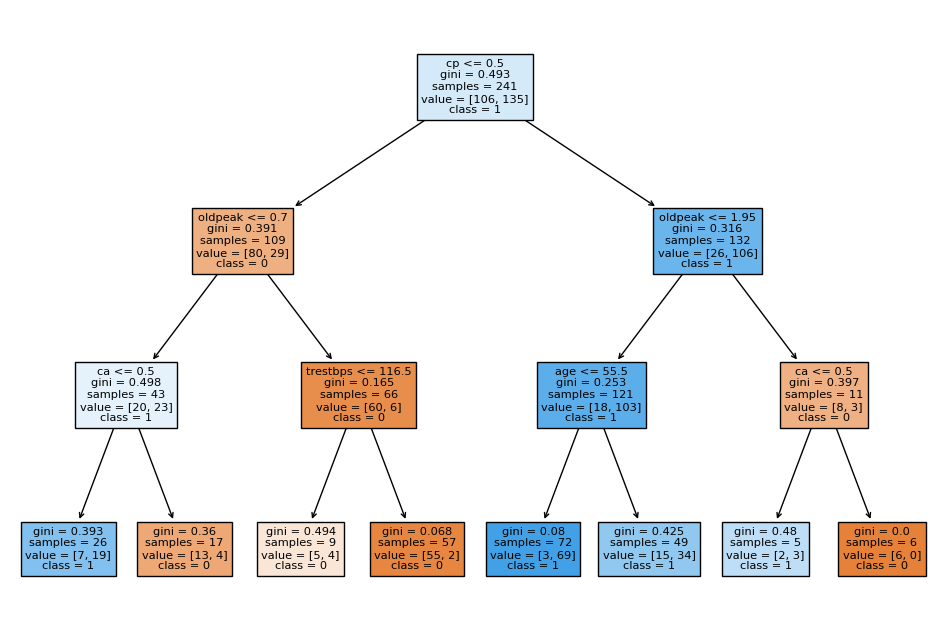

Accuracy: 0.7049180327868853
F-measure: 0.7272727272727273
Precision: 0.6486486486486487
Recall: 0.8275862068965517
********END D3********

------------------------------------------------------------
(4)K-means measures: 
Accuracy: 0.5662251655629139
F-measure: 0.6288951841359774
Precision: 0.5873015873015873
Recall: 0.676829268292683
------------------------------------------------------------
confusionMatrix results:
naive_bayes bMatrix : 
TN = 25
TP = 26
FN = 3
FP = 7
KNN bMatrix : 
TN = 21
TP = 18
FN = 11
FP = 11
DecisionTreeClassifier bMatrix : 
TN = 19
TP = 24
FN = 5
FP = 13
K-means bMatrix : 
TN = 60
TP = 111
FN = 53
FP = 78


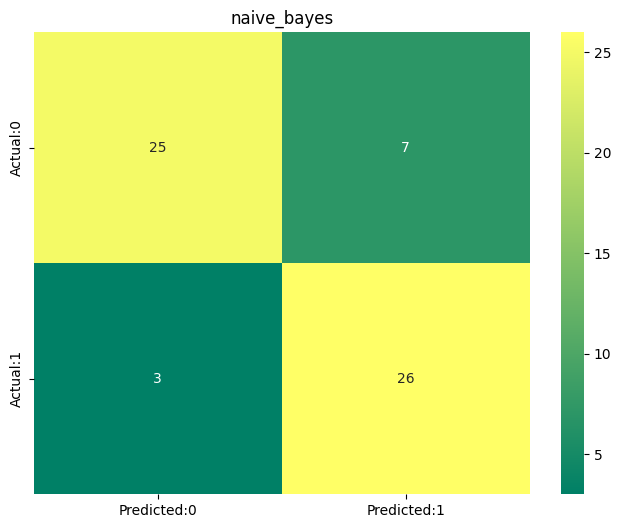

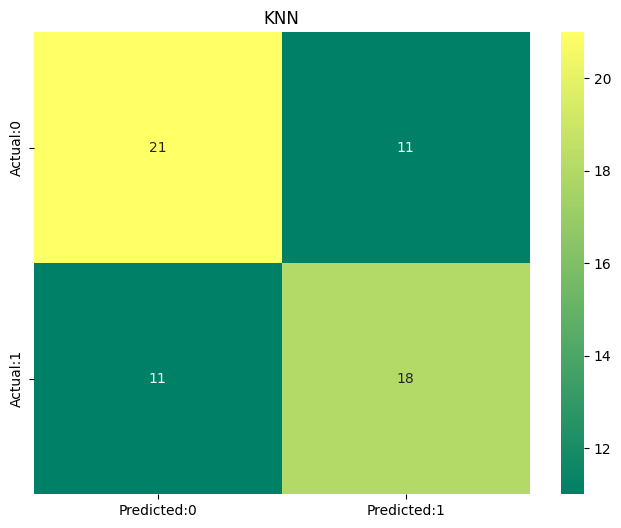

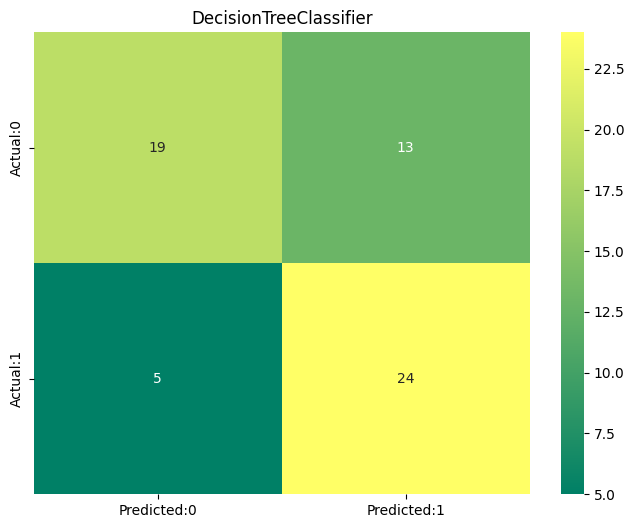

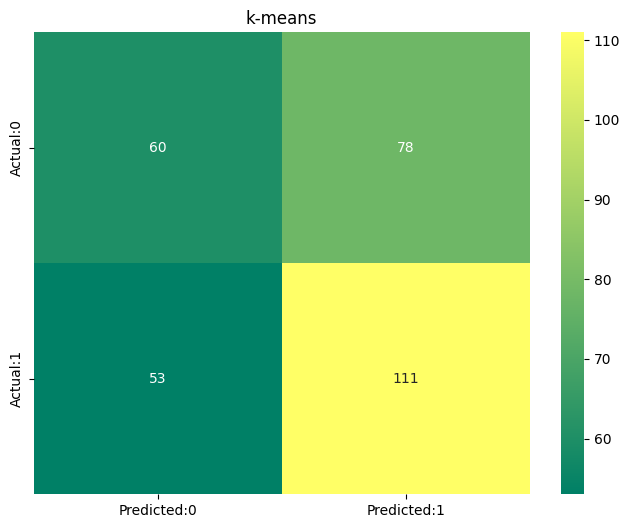

In [379]:
run5 = heart_df.copy()
run5 = run5.drop(columns='slope')
Normatilzation(run5,'thalach')


# create X split and y split
X = run5.iloc[:, :-1]
y = run5.iloc[:, -1]
# seperating the data with X_train, X_test, y_train, y_test by using train_test_split from sklearn.model_selection
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
lst=evaluationMeasures(X_train, y_train,X_test,y_test)
AllMatrix(y_test,lst,y)

77
564
1
(1)naive_bayes evaluation measures: 
Accuracy: 0.7049180327868853
F-measure: 0.7096774193548386
Precision: 0.6666666666666666
Recall: 0.7586206896551724
-----------------------------------------------------------
(2)KNN evaluation measures: 


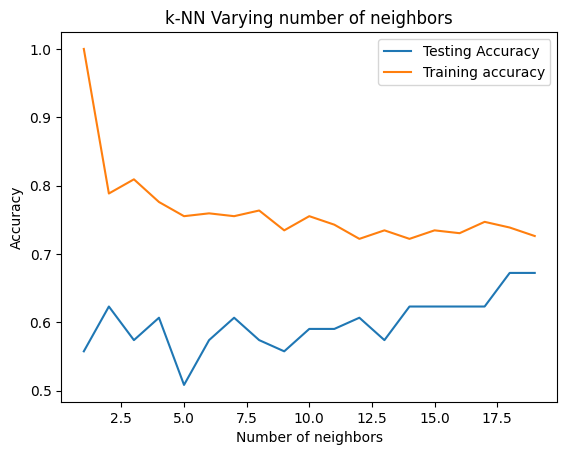

From the graph above, if we look at its acurrency values for each k from 1 to 20 (not include),
we will find that k = 18 gives the best result, therefore we will present the graph for k


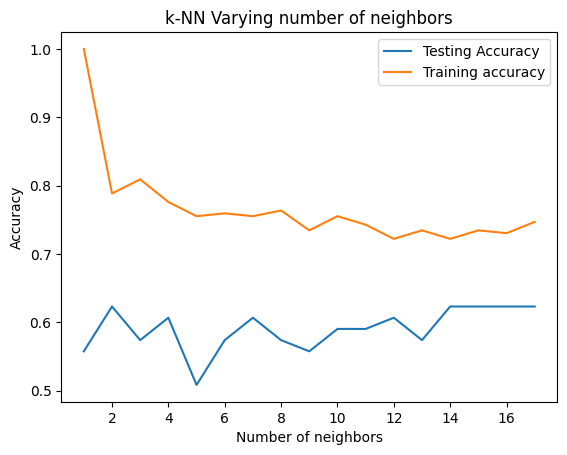

Accuracy: 0.6721311475409836
F-measure: 0.6774193548387097
Precision: 0.6363636363636364
Recall: 0.7241379310344828
------------------------------------------------------------
(3)DecisionTreeClassifier evaluation measures: 
********Start D1 : criterion='entropy',max_depth=2 ********


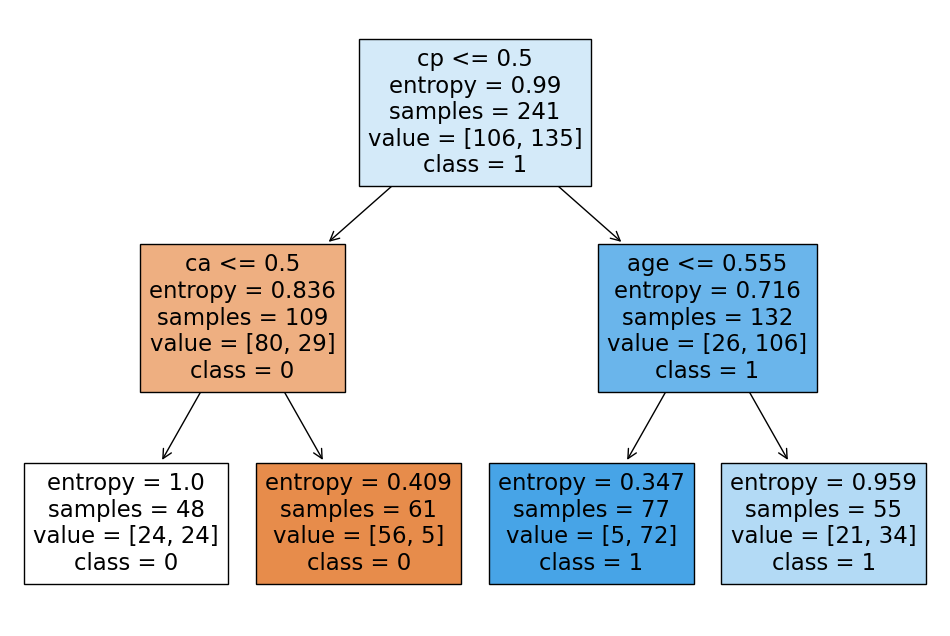

Accuracy: 0.7049180327868853
F-measure: 0.6785714285714286
Precision: 0.7037037037037037
Recall: 0.6551724137931034
********END D1********

********START D2 - criterion='entropy',max_depth=3 ********


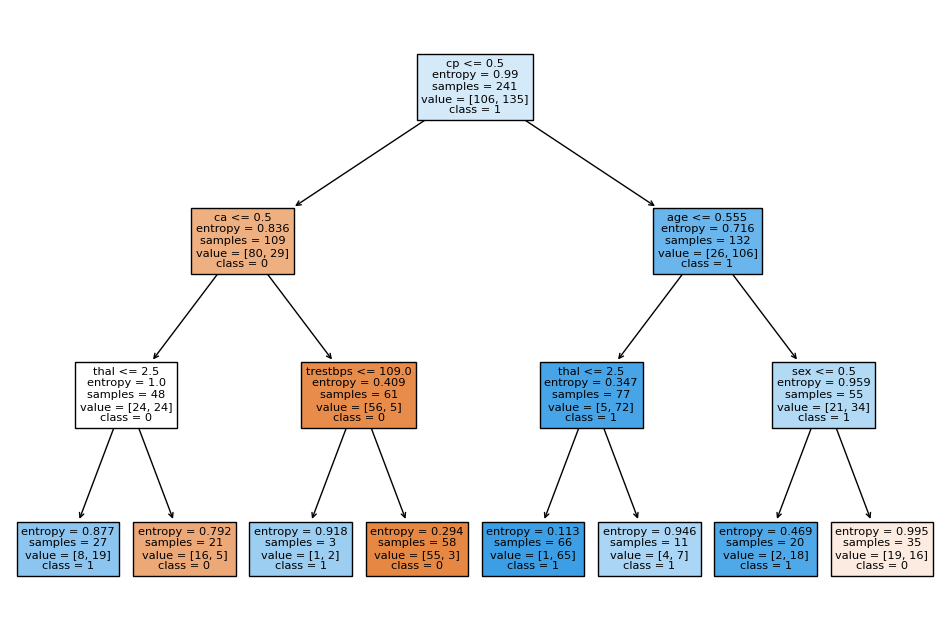

Accuracy: 0.7049180327868853
F-measure: 0.6785714285714286
Precision: 0.7037037037037037
Recall: 0.6551724137931034
********END D2********

START D3 - criterion='gini',max_depth=3


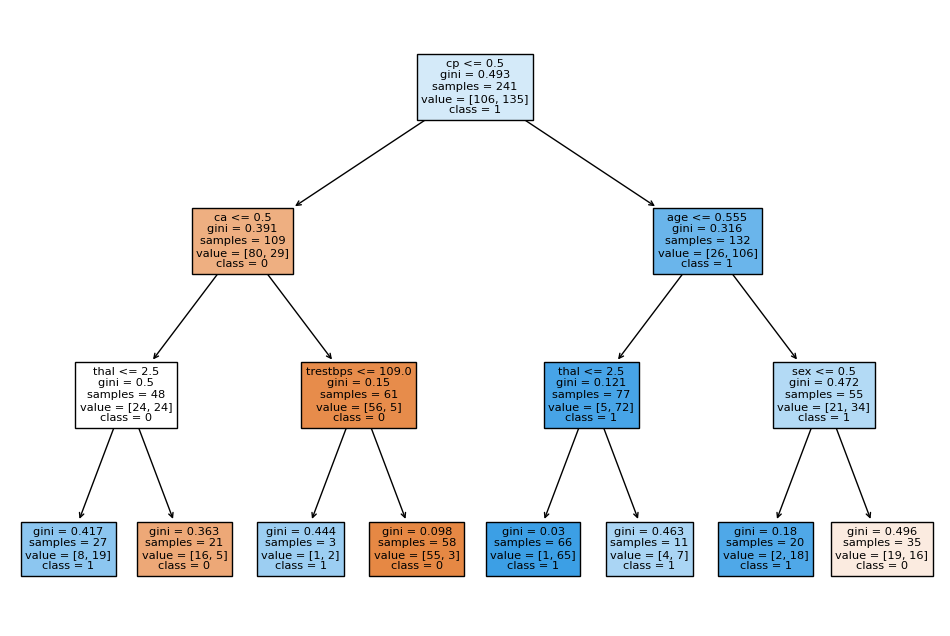

Accuracy: 0.7049180327868853
F-measure: 0.6785714285714286
Precision: 0.7037037037037037
Recall: 0.6551724137931034
********END D3********

------------------------------------------------------------
(4)K-means measures: 
Accuracy: 0.695364238410596
F-measure: 0.7386363636363636
Precision: 0.6914893617021277
Recall: 0.7926829268292683
------------------------------------------------------------
confusionMatrix results:
naive_bayes bMatrix : 
TN = 21
TP = 22
FN = 7
FP = 11
KNN bMatrix : 
TN = 20
TP = 21
FN = 8
FP = 12
DecisionTreeClassifier bMatrix : 
TN = 24
TP = 19
FN = 10
FP = 8
K-means bMatrix : 
TN = 80
TP = 130
FN = 34
FP = 58


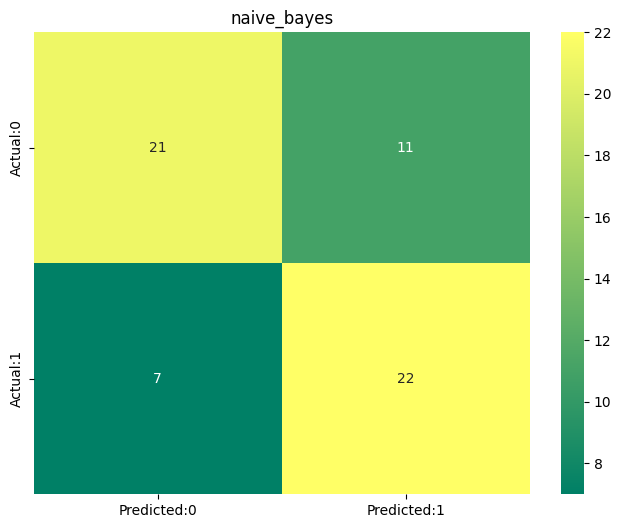

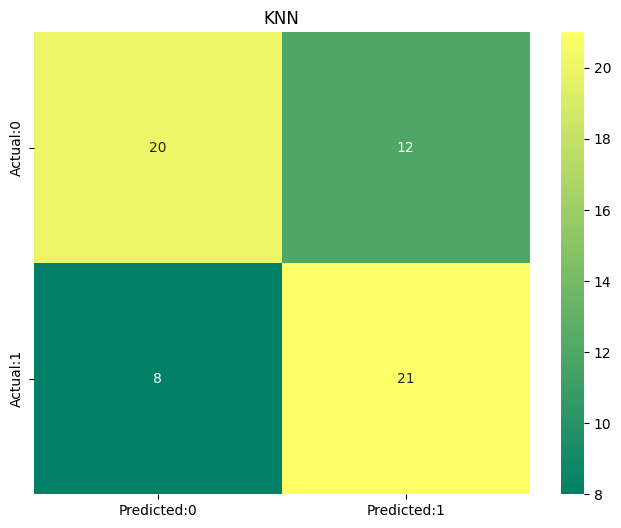

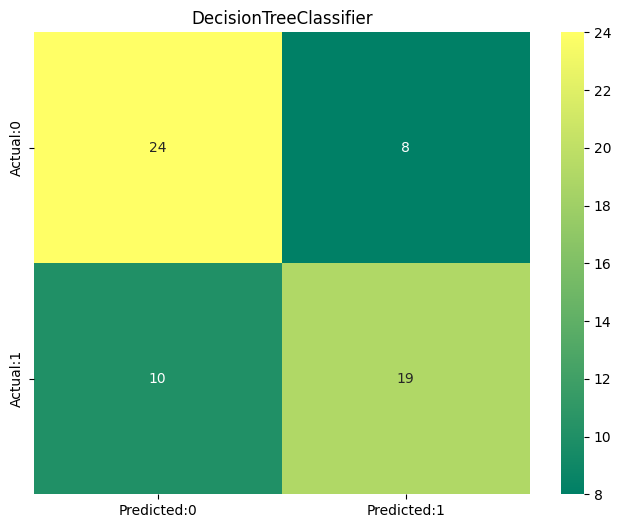

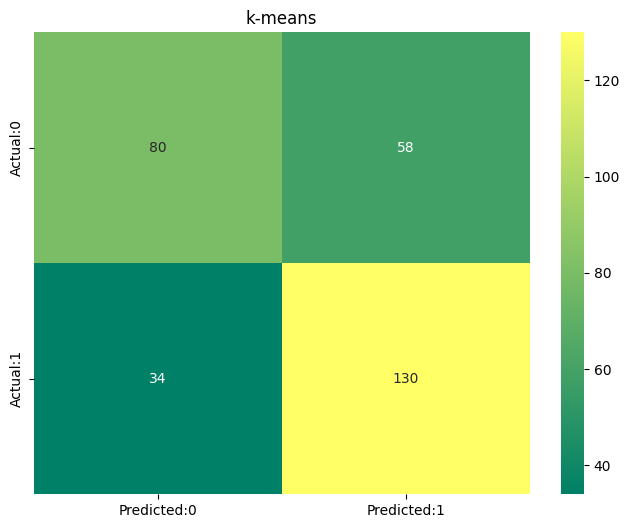

In [389]:
run6 = heart_df.copy()
run6 = run6.drop(columns='oldpeak')
run6 = run6.drop(columns='exang')
Normatilzation(run6,'age')
Normatilzation(run6,'chol')
Normatilzation(run6,'fbs')



# create X split and y split
X = run6.iloc[:, :-1]
y = run6.iloc[:, -1]
# seperating the data with X_train, X_test, y_train, y_test by using train_test_split from sklearn.model_selection
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
lst=evaluationMeasures(X_train, y_train,X_test,y_test)
AllMatrix(y_test,lst,y)

200
(1)naive_bayes evaluation measures: 
Accuracy: 0.8524590163934426
F-measure: 0.847457627118644
Precision: 0.8333333333333334
Recall: 0.8620689655172413
-----------------------------------------------------------
(2)KNN evaluation measures: 


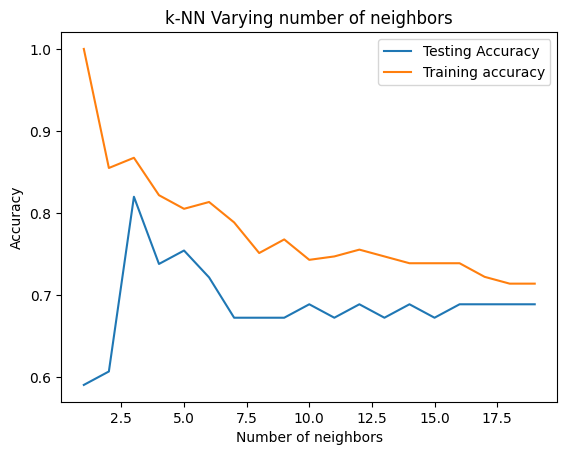

From the graph above, if we look at its acurrency values for each k from 1 to 20 (not include),
we will find that k = 3 gives the best result, therefore we will present the graph for k


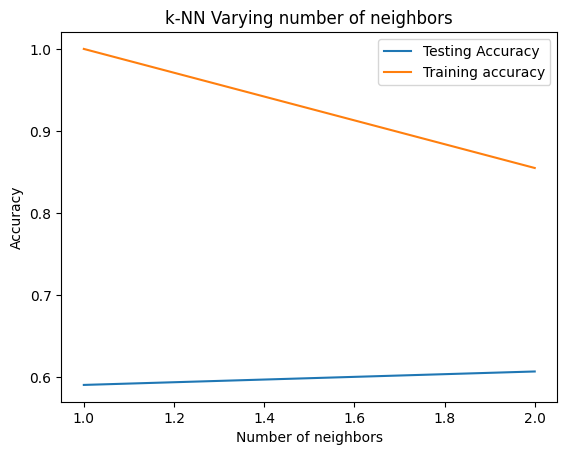

Accuracy: 0.819672131147541
F-measure: 0.835820895522388
Precision: 0.7368421052631579
Recall: 0.9655172413793104
------------------------------------------------------------
(3)DecisionTreeClassifier evaluation measures: 
********Start D1 : criterion='entropy',max_depth=2 ********


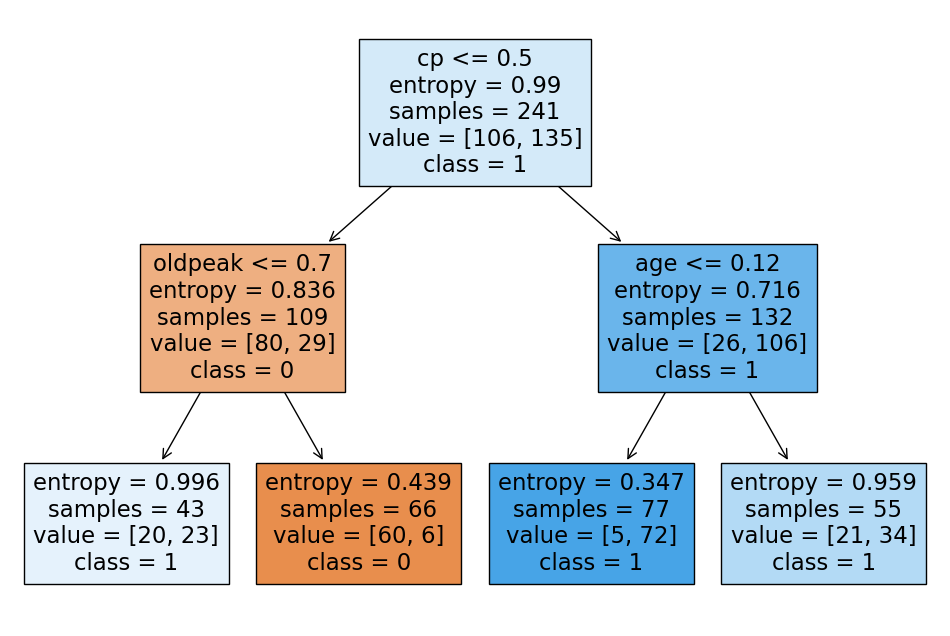

Accuracy: 0.7049180327868853
F-measure: 0.7272727272727273
Precision: 0.6486486486486487
Recall: 0.8275862068965517
********END D1********

********START D2 - criterion='entropy',max_depth=3 ********


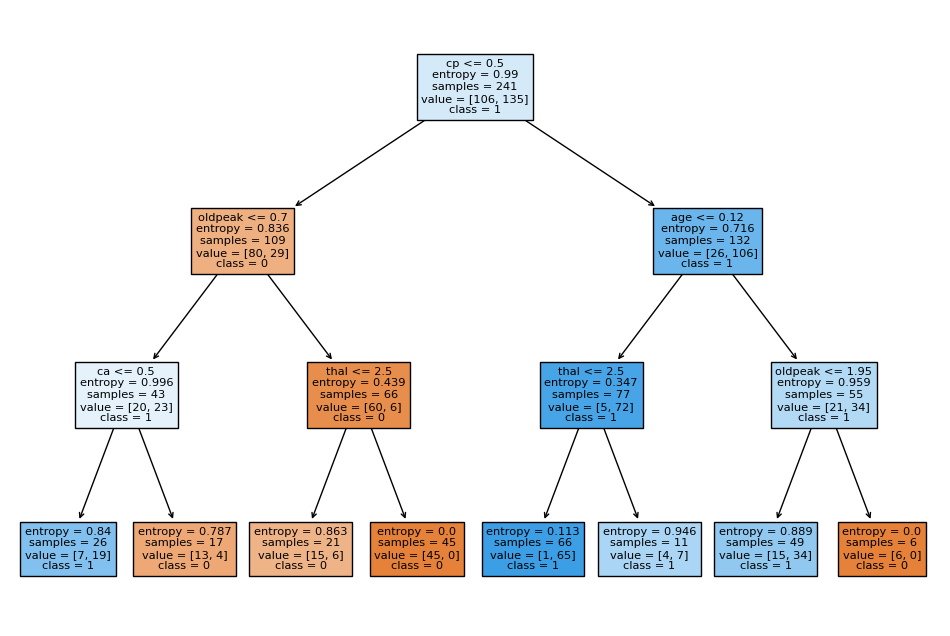

Accuracy: 0.7049180327868853
F-measure: 0.7272727272727273
Precision: 0.6486486486486487
Recall: 0.8275862068965517
********END D2********

START D3 - criterion='gini',max_depth=3


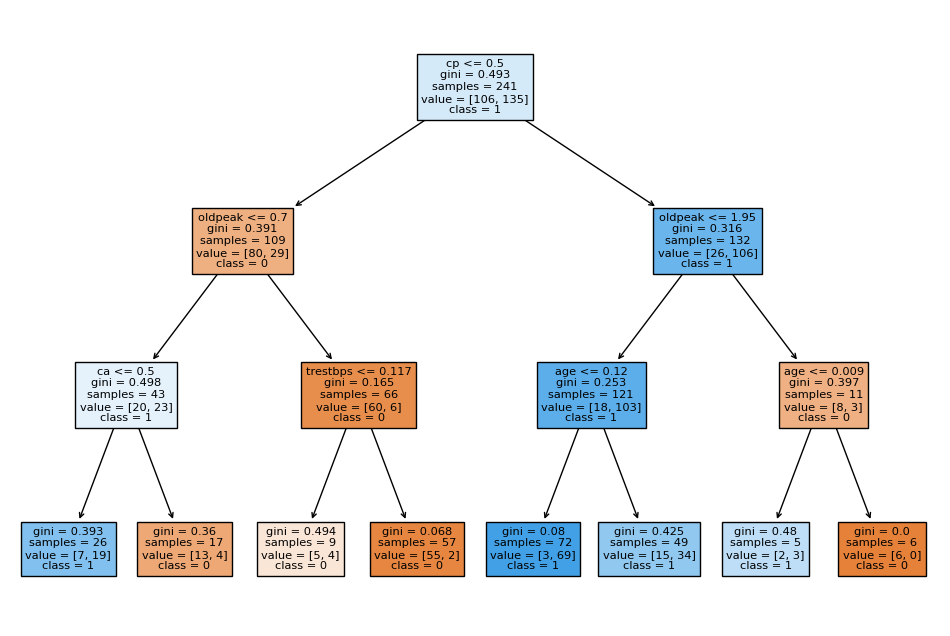

Accuracy: 0.7049180327868853
F-measure: 0.7272727272727273
Precision: 0.6486486486486487
Recall: 0.8275862068965517
********END D3********

------------------------------------------------------------
(4)K-means measures: 
Accuracy: 0.7019867549668874
F-measure: 0.7413793103448275
Precision: 0.7010869565217391
Recall: 0.7865853658536586
------------------------------------------------------------
confusionMatrix results:
naive_bayes bMatrix : 
TN = 27
TP = 25
FN = 4
FP = 5
KNN bMatrix : 
TN = 22
TP = 28
FN = 1
FP = 10
DecisionTreeClassifier bMatrix : 
TN = 19
TP = 24
FN = 5
FP = 13
K-means bMatrix : 
TN = 83
TP = 129
FN = 35
FP = 55


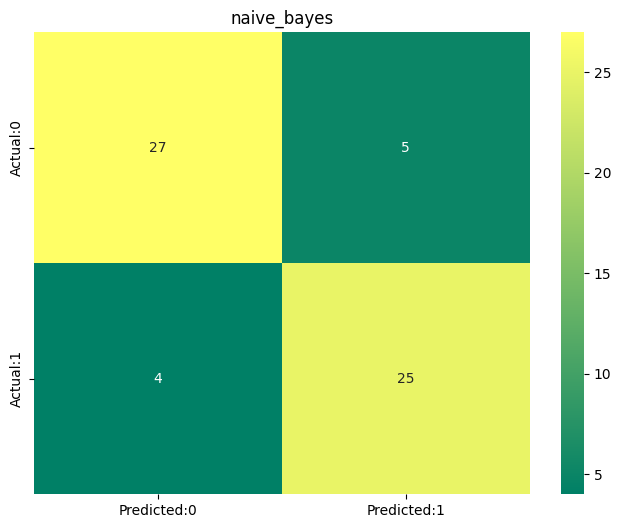

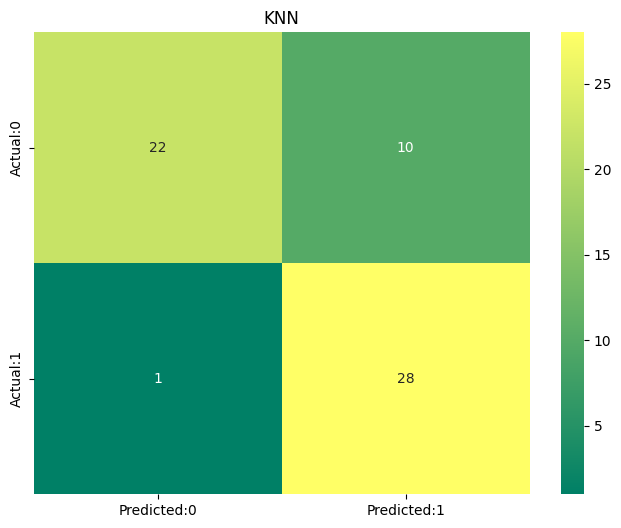

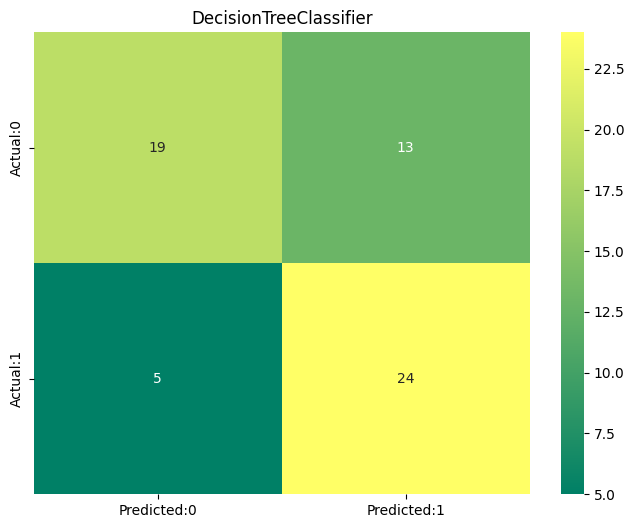

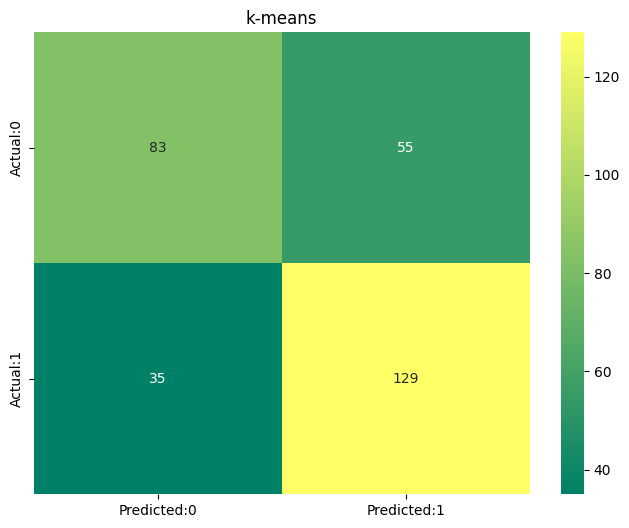

In [395]:
run7 = heart_df.copy()
zscore(run7,'age')
zscore(run7,'chol')
Normatilzation(run7,'trestbps')

# create X split and y split
X = run7.iloc[:, :-1]
y = run7.iloc[:, -1]
# seperating the data with X_train, X_test, y_train, y_test by using train_test_split from sklearn.model_selection
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
lst=evaluationMeasures(X_train, y_train,X_test,y_test)
AllMatrix(y_test,lst,y)

(1)naive_bayes evaluation measures: 
Accuracy: 0.8524590163934426
F-measure: 0.847457627118644
Precision: 0.8333333333333334
Recall: 0.8620689655172413
-----------------------------------------------------------
(2)KNN evaluation measures: 


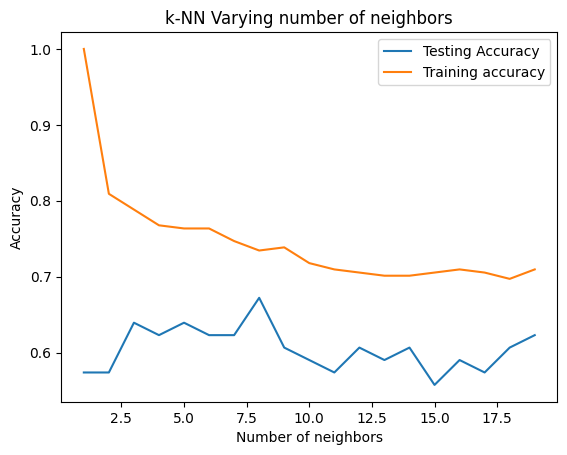

From the graph above, if we look at its acurrency values for each k from 1 to 20 (not include),
we will find that k = 8 gives the best result, therefore we will present the graph for k


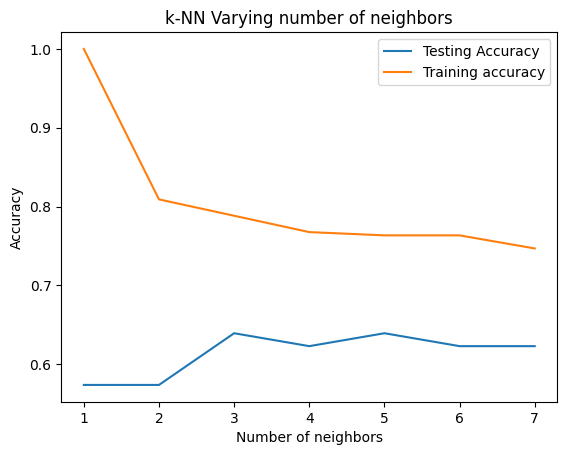

Accuracy: 0.6721311475409836
F-measure: 0.696969696969697
Precision: 0.6216216216216216
Recall: 0.7931034482758621
------------------------------------------------------------
(3)DecisionTreeClassifier evaluation measures: 
********Start D1 : criterion='entropy',max_depth=2 ********


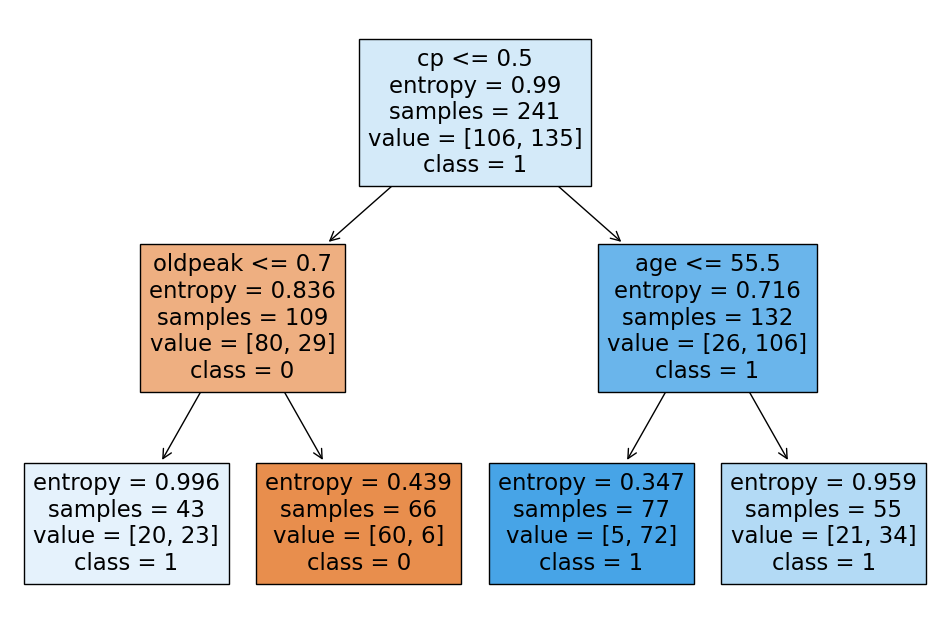

Accuracy: 0.7049180327868853
F-measure: 0.7272727272727273
Precision: 0.6486486486486487
Recall: 0.8275862068965517
********END D1********

********START D2 - criterion='entropy',max_depth=3 ********


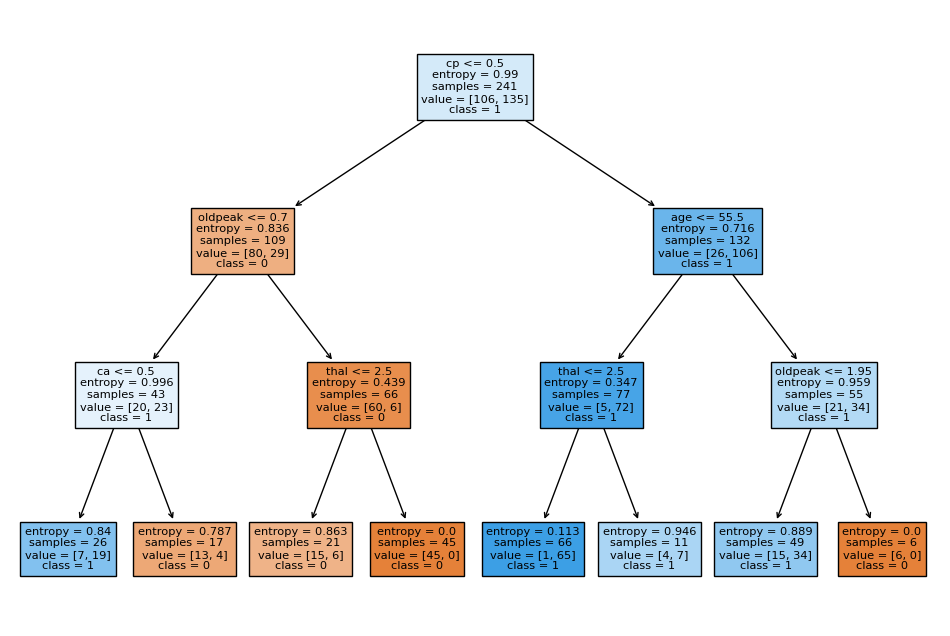

Accuracy: 0.7049180327868853
F-measure: 0.7272727272727273
Precision: 0.6486486486486487
Recall: 0.8275862068965517
********END D2********

START D3 - criterion='gini',max_depth=3


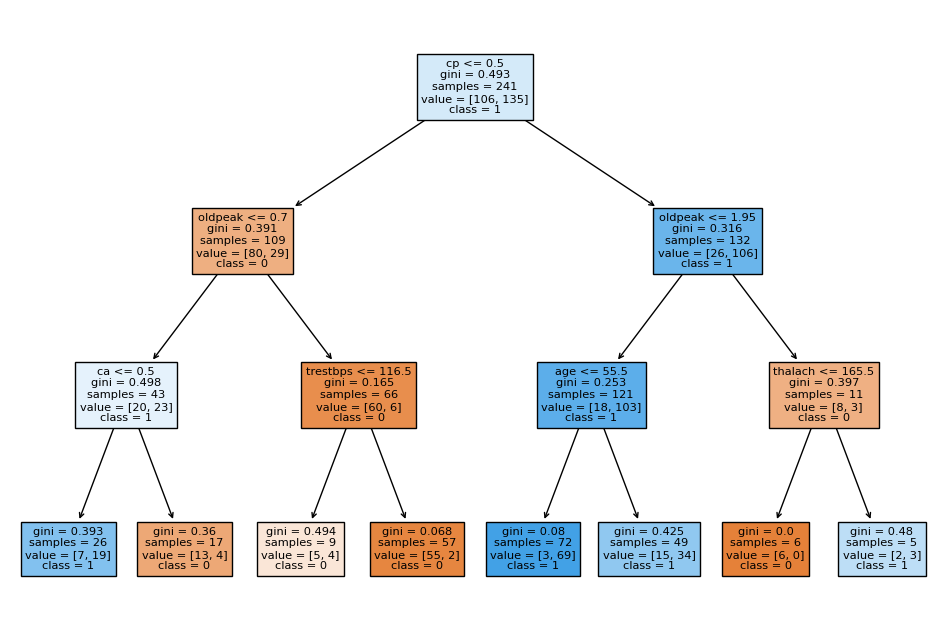

Accuracy: 0.7049180327868853
F-measure: 0.7272727272727273
Precision: 0.6486486486486487
Recall: 0.8275862068965517
********END D3********

------------------------------------------------------------
(4)K-means measures: 
Accuracy: 0.423841059602649
F-measure: 0.36496350364963503
Precision: 0.45454545454545453
Recall: 0.3048780487804878
------------------------------------------------------------
confusionMatrix results:
naive_bayes bMatrix : 
TN = 27
TP = 25
FN = 4
FP = 5
KNN bMatrix : 
TN = 18
TP = 23
FN = 6
FP = 14
DecisionTreeClassifier bMatrix : 
TN = 19
TP = 24
FN = 5
FP = 13
K-means bMatrix : 
TN = 78
TP = 50
FN = 114
FP = 60


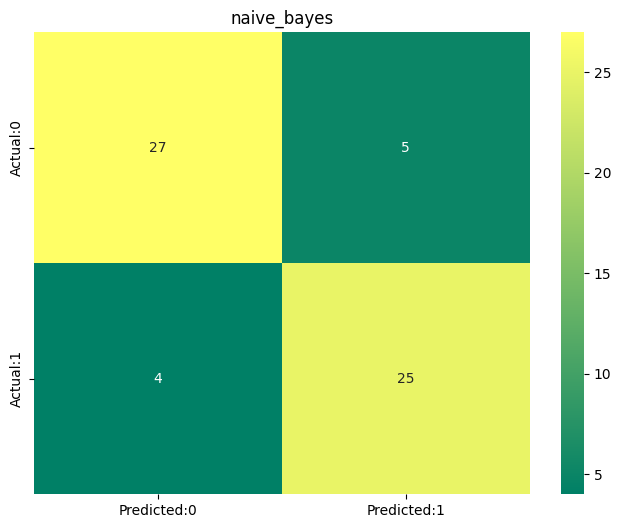

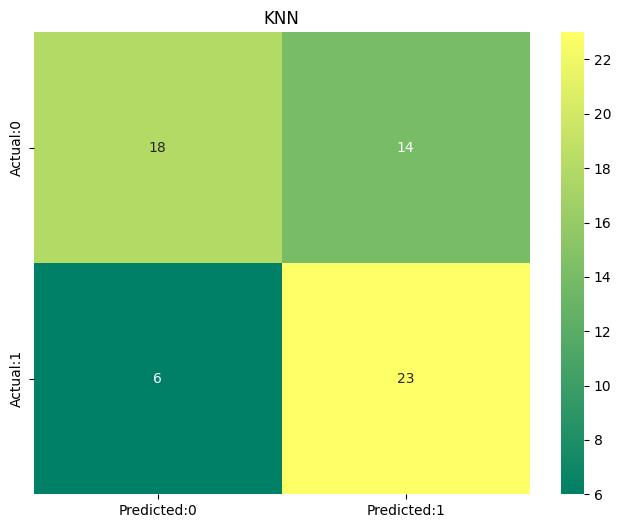

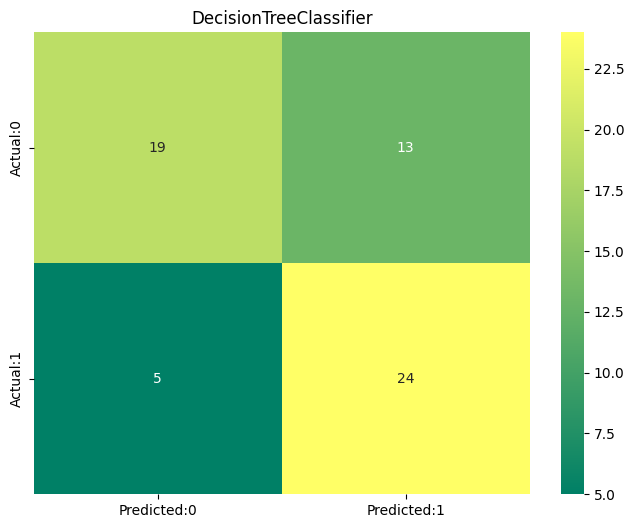

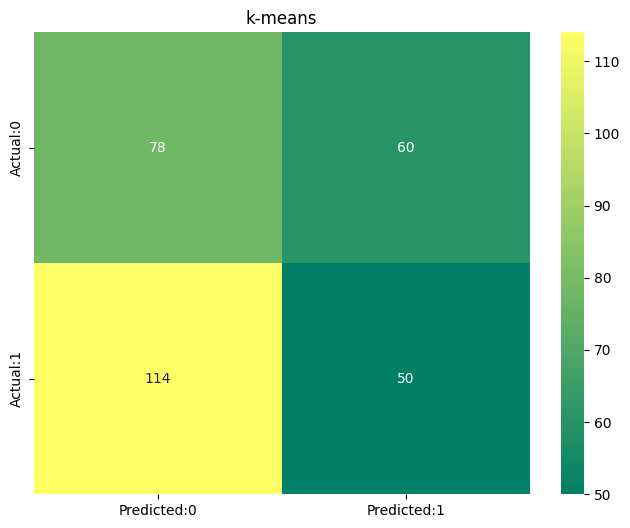

In [397]:
run8 = heart_df.copy()

# create X split and y split
X = run8.iloc[:, :-1]
y = run8.iloc[:, -1]
# seperating the data with X_train, X_test, y_train, y_test by using train_test_split from sklearn.model_selection
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
lst=evaluationMeasures(X_train, y_train,X_test,y_test)
AllMatrix(y_test,lst,y)

1
4
(1)naive_bayes evaluation measures: 
Accuracy: 0.8524590163934426
F-measure: 0.847457627118644
Precision: 0.8333333333333334
Recall: 0.8620689655172413
-----------------------------------------------------------
(2)KNN evaluation measures: 


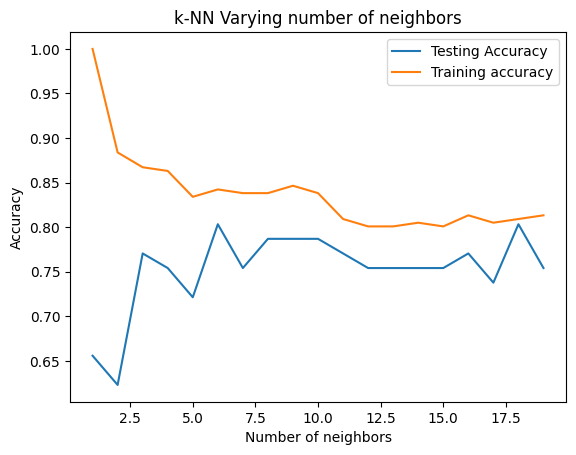

From the graph above, if we look at its acurrency values for each k from 1 to 20 (not include),
we will find that k = 6 gives the best result, therefore we will present the graph for k


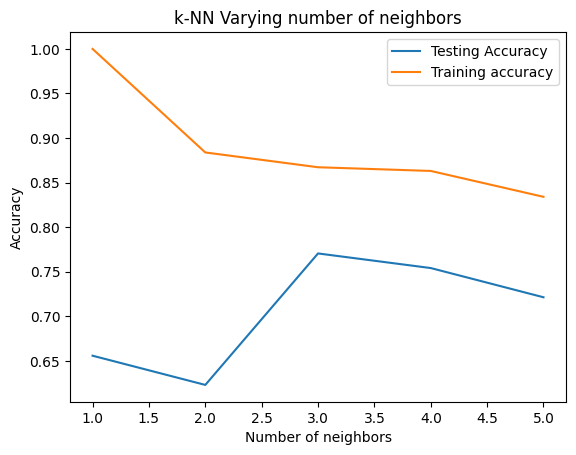

Accuracy: 0.8032786885245902
F-measure: 0.7999999999999999
Precision: 0.7741935483870968
Recall: 0.8275862068965517
------------------------------------------------------------
(3)DecisionTreeClassifier evaluation measures: 
********Start D1 : criterion='entropy',max_depth=2 ********


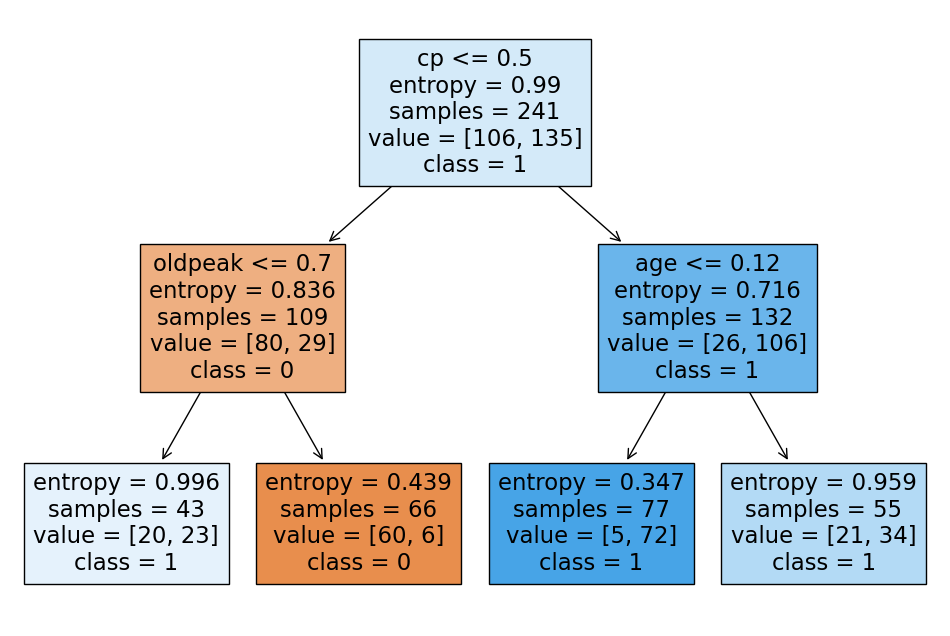

Accuracy: 0.7049180327868853
F-measure: 0.7272727272727273
Precision: 0.6486486486486487
Recall: 0.8275862068965517
********END D1********

********START D2 - criterion='entropy',max_depth=3 ********


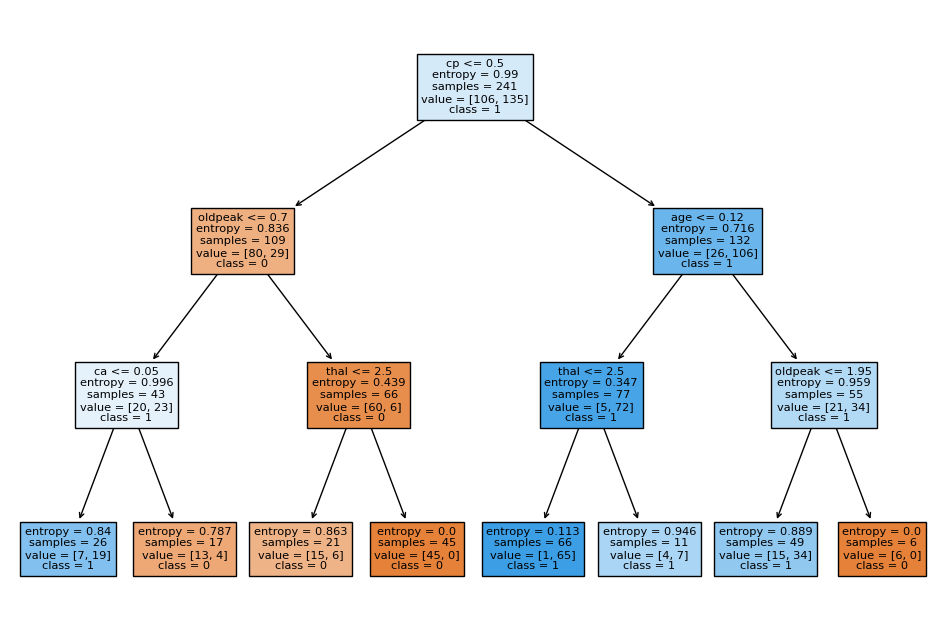

Accuracy: 0.7049180327868853
F-measure: 0.7272727272727273
Precision: 0.6486486486486487
Recall: 0.8275862068965517
********END D2********

START D3 - criterion='gini',max_depth=3


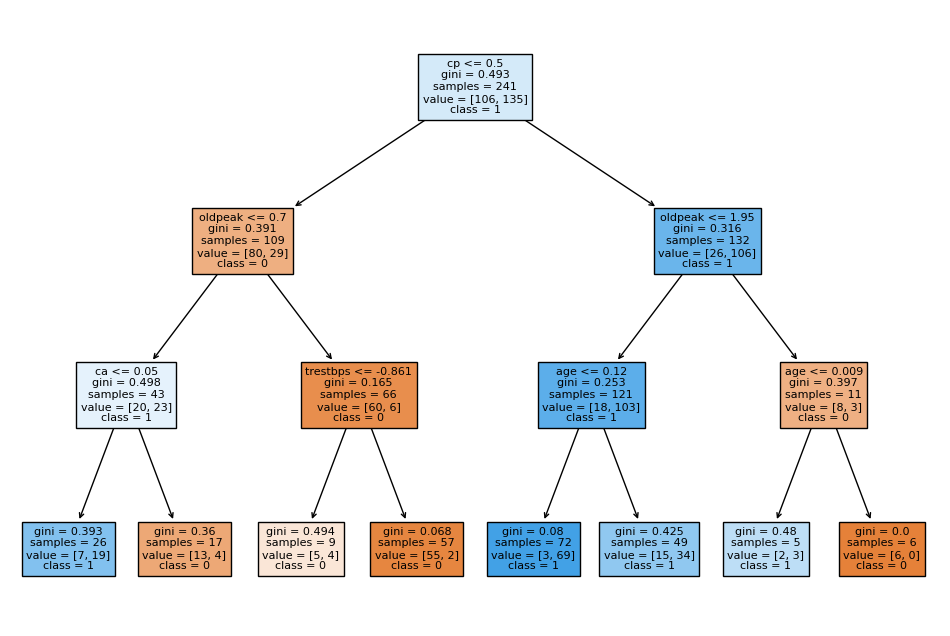

Accuracy: 0.7049180327868853
F-measure: 0.7272727272727273
Precision: 0.6486486486486487
Recall: 0.8275862068965517
********END D3********

------------------------------------------------------------
(4)K-means measures: 
Accuracy: 0.7748344370860927
F-measure: 0.8089887640449439
Precision: 0.75
Recall: 0.8780487804878049
------------------------------------------------------------
confusionMatrix results:
naive_bayes bMatrix : 
TN = 27
TP = 25
FN = 4
FP = 5
KNN bMatrix : 
TN = 25
TP = 24
FN = 5
FP = 7
DecisionTreeClassifier bMatrix : 
TN = 19
TP = 24
FN = 5
FP = 13
K-means bMatrix : 
TN = 90
TP = 144
FN = 20
FP = 48


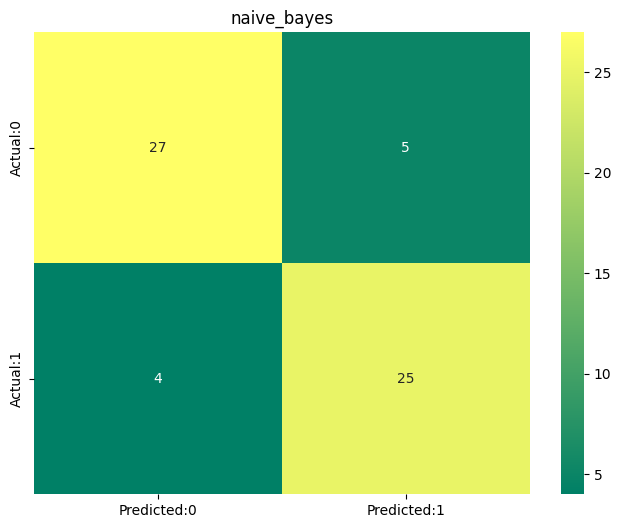

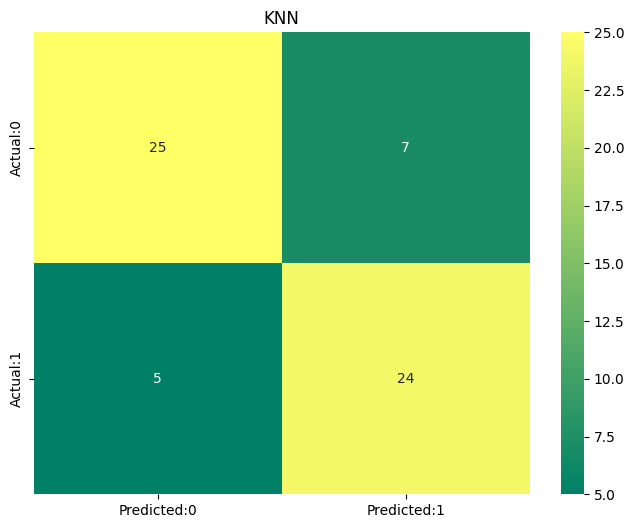

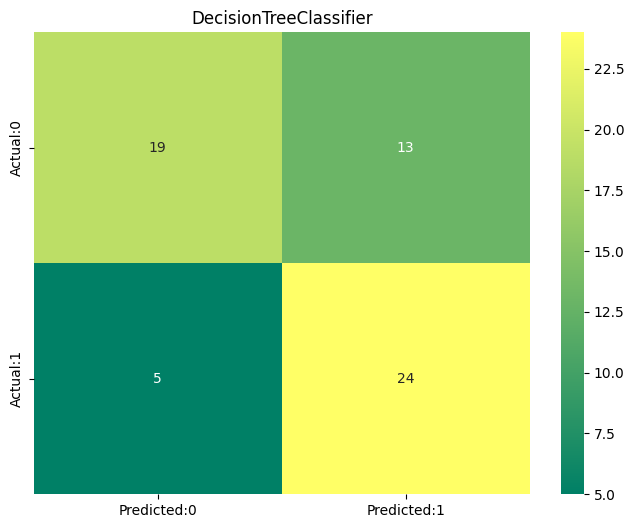

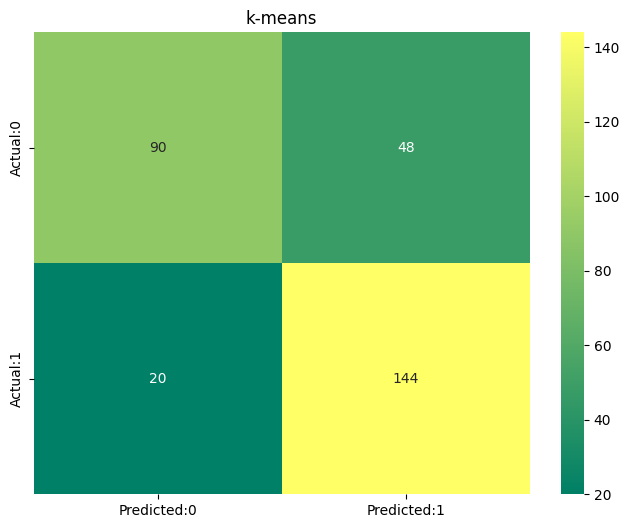

In [406]:
run9 = heart_df.copy()
zscore(run9,'age')
zscore(run9,'chol')
zscore(run9,'trestbps')
zscore(run9,'thalach')
Normatilzation(run9,'fbs')
Normatilzation(run9,'ca')





# create X split and y split
X = run9.iloc[:, :-1]
y = run9.iloc[:, -1]
# seperating the data with X_train, X_test, y_train, y_test by using train_test_split from sklearn.model_selection
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
lst=evaluationMeasures(X_train, y_train,X_test,y_test)
AllMatrix(y_test,lst,y)

In [ ]:
run10 = heart_df.copy()
big_bin_mean(run10,'trestbps',50)
big_bin_mean(run10,'thalach',50)



# create X split and y split
X = run10.iloc[:, :-1]
y = run10.iloc[:, -1]
# seperating the data with X_train, X_test, y_train, y_test by using train_test_split from sklearn.model_selection
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
lst=evaluationMeasures(X_train, y_train,X_test,y_test)
AllMatrix(y_test,lst,y)

2
1
3
4
(1)naive_bayes evaluation measures: 
Accuracy: 0.8032786885245902
F-measure: 0.7999999999999999
Precision: 0.7741935483870968
Recall: 0.8275862068965517
-----------------------------------------------------------
(2)KNN evaluation measures: 


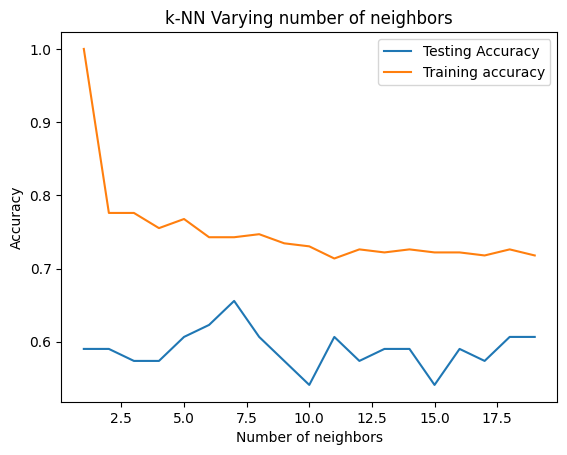

From the graph above, if we look at its acurrency values for each k from 1 to 20 (not include),
we will find that k = 7 gives the best result, therefore we will present the graph for k


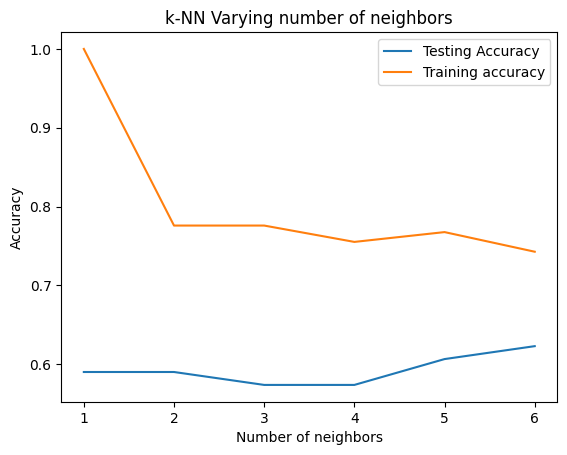

Accuracy: 0.6557377049180327
F-measure: 0.6956521739130435
Precision: 0.6
Recall: 0.8275862068965517
------------------------------------------------------------
(3)DecisionTreeClassifier evaluation measures: 
********Start D1 : criterion='entropy',max_depth=2 ********


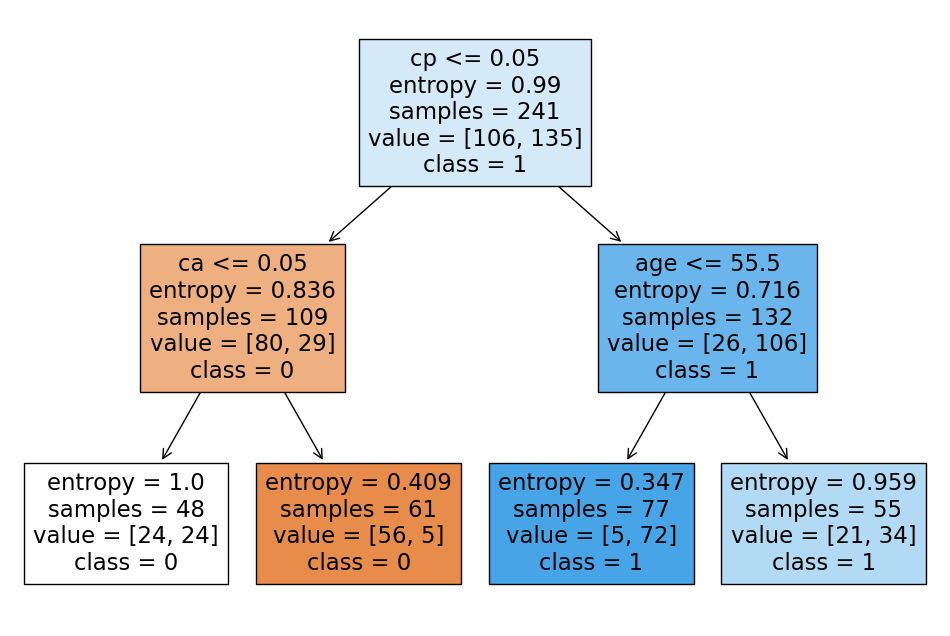

Accuracy: 0.7049180327868853
F-measure: 0.6785714285714286
Precision: 0.7037037037037037
Recall: 0.6551724137931034
********END D1********

********START D2 - criterion='entropy',max_depth=3 ********


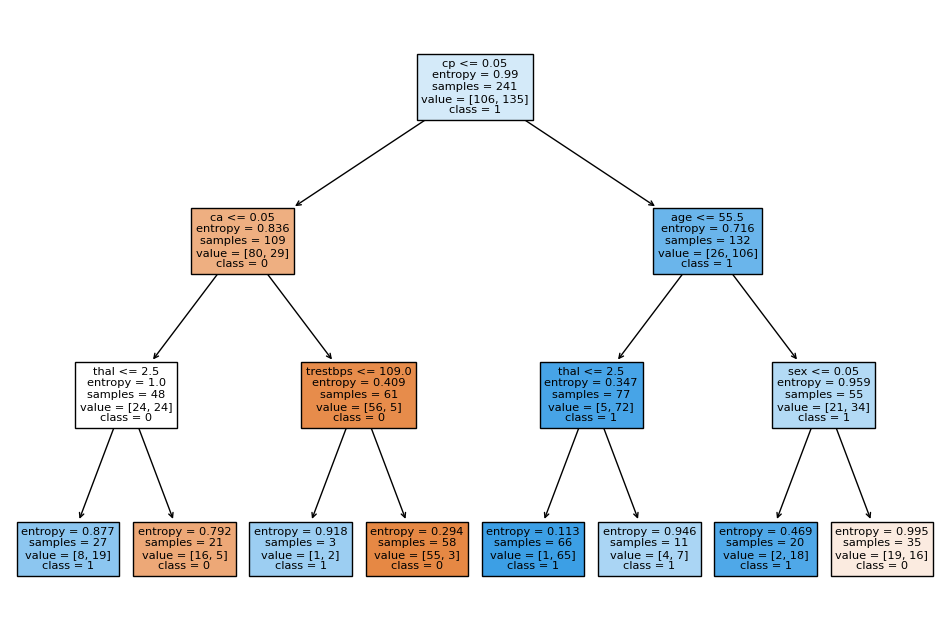

Accuracy: 0.7049180327868853
F-measure: 0.6785714285714286
Precision: 0.7037037037037037
Recall: 0.6551724137931034
********END D2********

START D3 - criterion='gini',max_depth=3


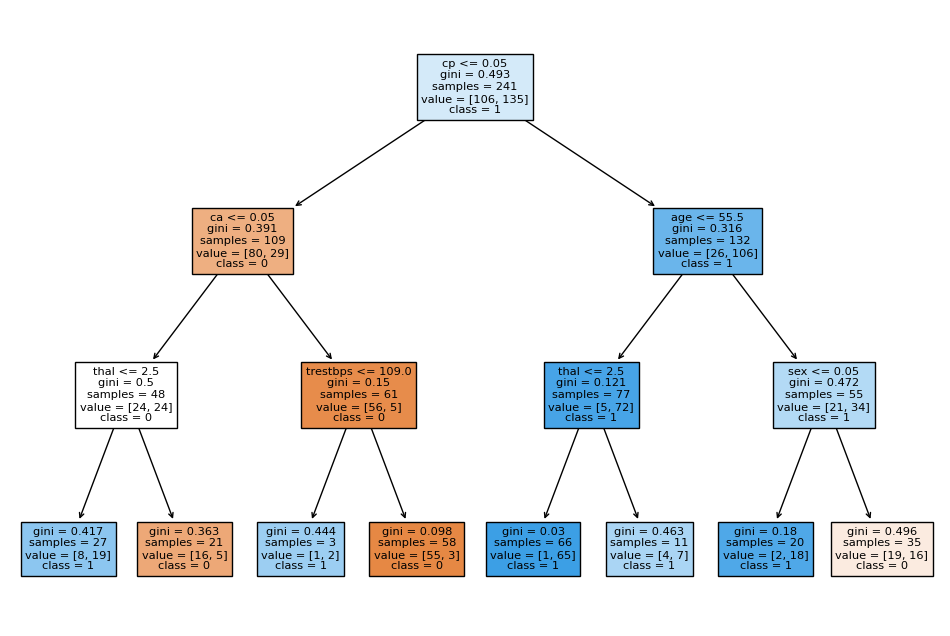

Accuracy: 0.7049180327868853
F-measure: 0.6785714285714286
Precision: 0.7037037037037037
Recall: 0.6551724137931034
********END D3********

------------------------------------------------------------
(4)K-means measures: 
Accuracy: 0.7119205298013245
F-measure: 0.7448680351906158
Precision: 0.7175141242937854
Recall: 0.774390243902439
------------------------------------------------------------
confusionMatrix results:
naive_bayes bMatrix : 
TN = 25
TP = 24
FN = 5
FP = 7
KNN bMatrix : 
TN = 16
TP = 24
FN = 5
FP = 16
DecisionTreeClassifier bMatrix : 
TN = 24
TP = 19
FN = 10
FP = 8
K-means bMatrix : 
TN = 88
TP = 127
FN = 37
FP = 50


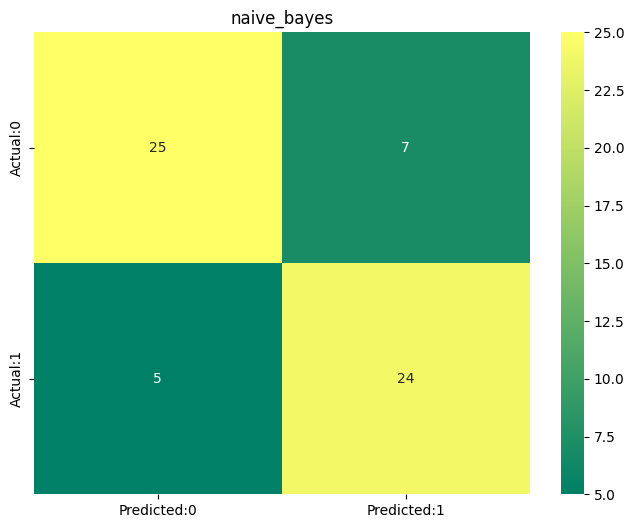

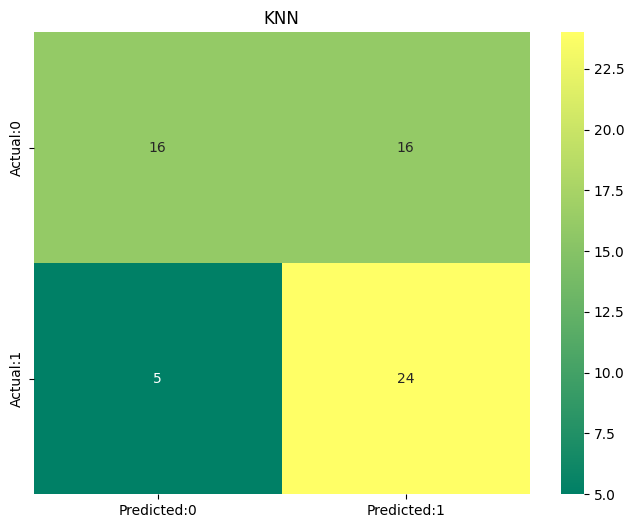

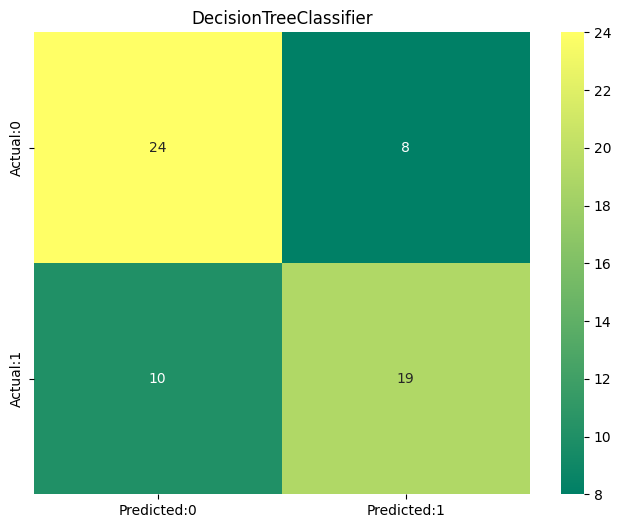

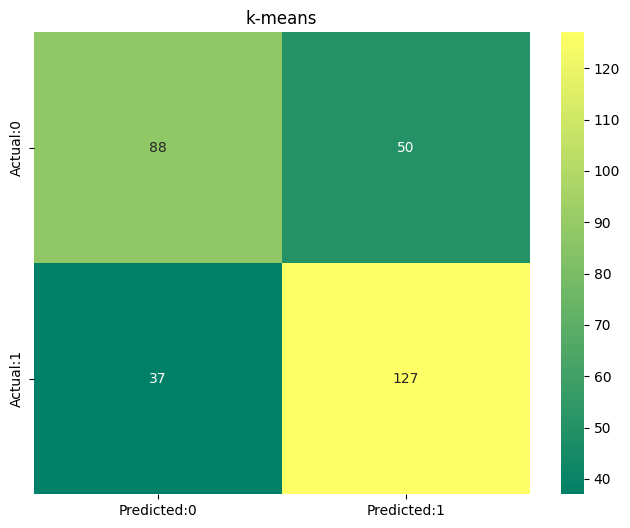

In [432]:
run11 = heart_df.copy()
run11 = run11.drop(columns='oldpeak')
min_max(run11,'chol')
min_max(run11,'slope')
Normatilzation(run11,'restecg')
Normatilzation(run11,'sex')
Normatilzation(run11,'cp')
Normatilzation(run11,'ca')






# create X split and y split
X = run11.iloc[:, :-1]
y = run11.iloc[:, -1]
# seperating the data with X_train, X_test, y_train, y_test by using train_test_split from sklearn.model_selection
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
lst=evaluationMeasures(X_train, y_train,X_test,y_test)
AllMatrix(y_test,lst,y)

best runnig
1
4
(1)naive_bayes evaluation measures: 
Accuracy: 0.8524590163934426
F-measure: 0.847457627118644
Precision: 0.8333333333333334
Recall: 0.8620689655172413
-----------------------------------------------------------
(2)KNN evaluation measures: 


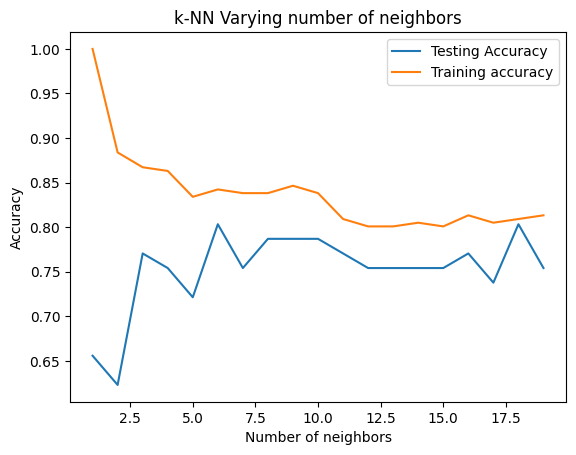

From the graph above, if we look at its acurrency values for each k from 1 to 20 (not include),
we will find that k = 6 gives the best result, therefore we will present the graph for k


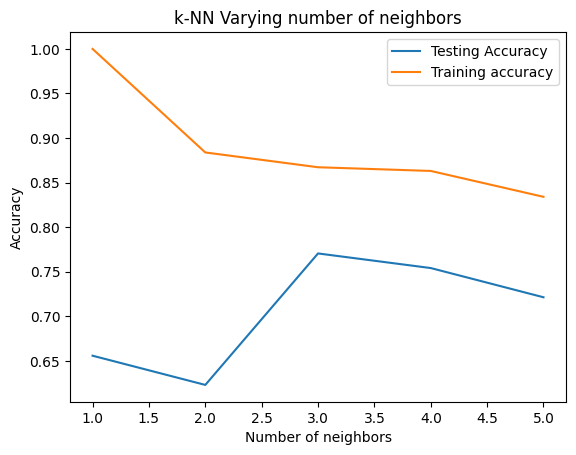

Accuracy: 0.8032786885245902
F-measure: 0.7999999999999999
Precision: 0.7741935483870968
Recall: 0.8275862068965517
------------------------------------------------------------
(3)DecisionTreeClassifier evaluation measures: 
********Start D1 : criterion='entropy',max_depth=2 ********


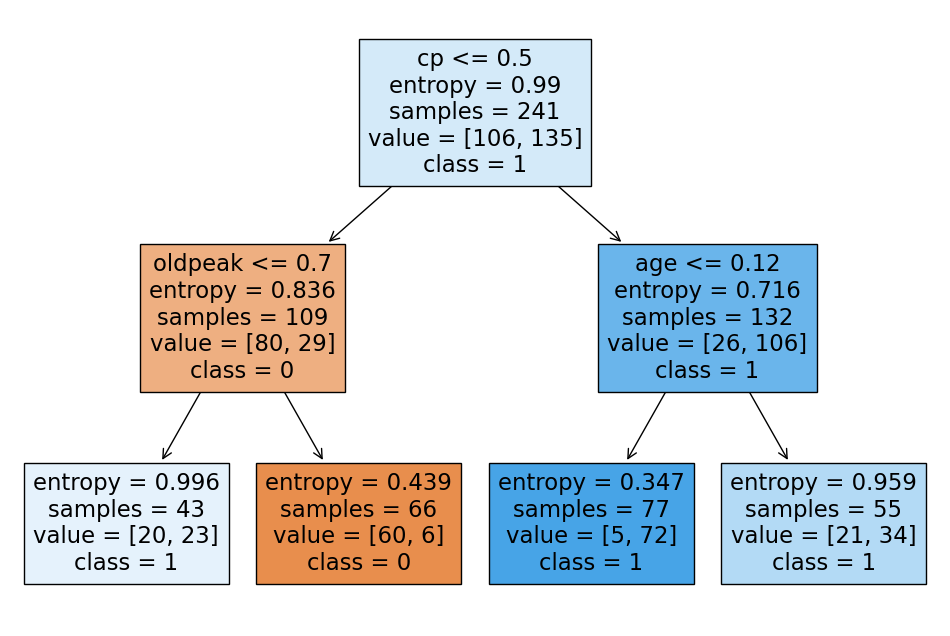

Accuracy: 0.7049180327868853
F-measure: 0.7272727272727273
Precision: 0.6486486486486487
Recall: 0.8275862068965517
********END D1********

********START D2 - criterion='entropy',max_depth=3 ********


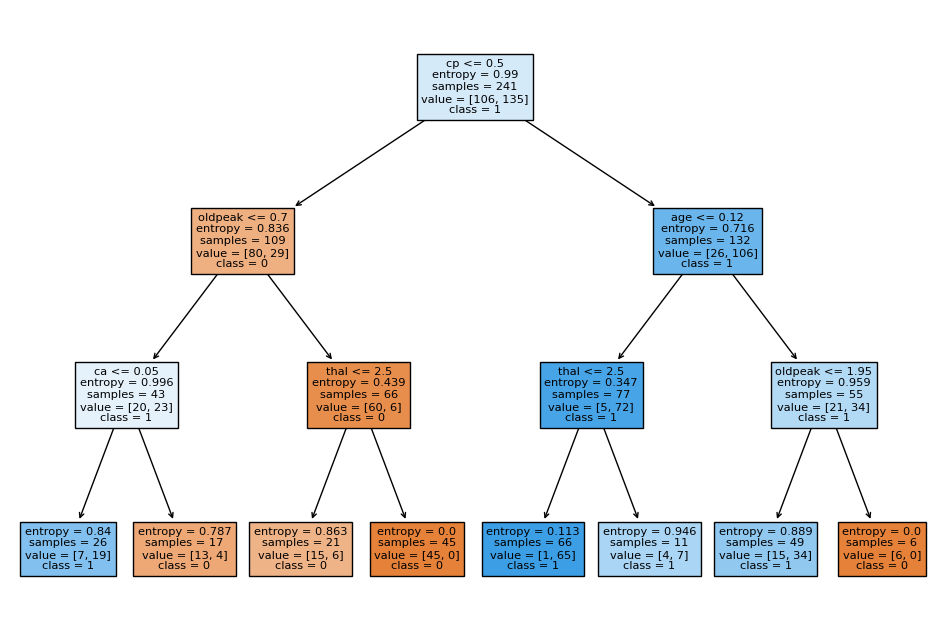

Accuracy: 0.7049180327868853
F-measure: 0.7272727272727273
Precision: 0.6486486486486487
Recall: 0.8275862068965517
********END D2********

START D3 - criterion='gini',max_depth=3


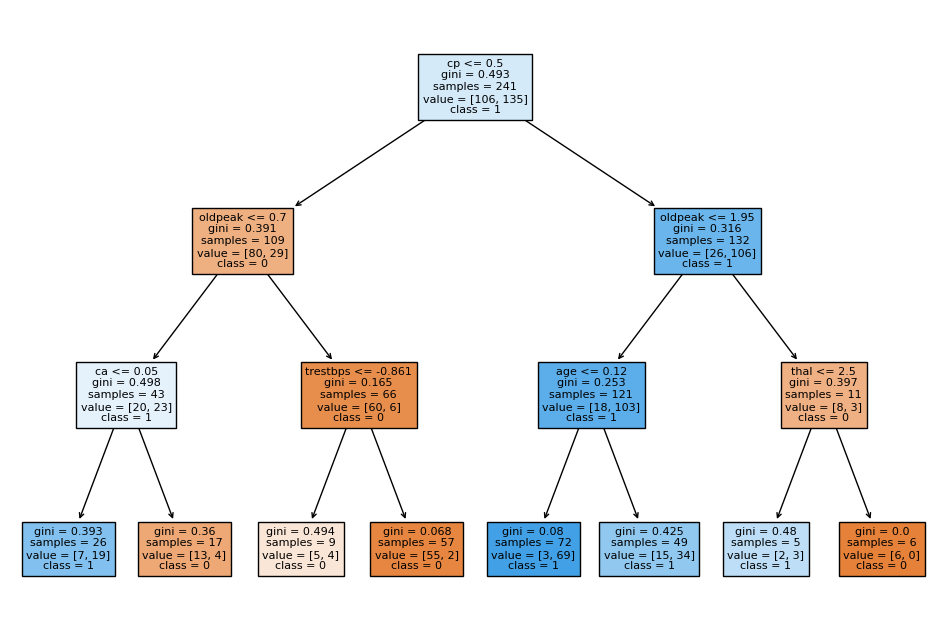

Accuracy: 0.7049180327868853
F-measure: 0.7272727272727273
Precision: 0.6486486486486487
Recall: 0.8275862068965517
********END D3********

------------------------------------------------------------
(4)K-means measures: 
Accuracy: 0.7748344370860927
F-measure: 0.8089887640449439
Precision: 0.75
Recall: 0.8780487804878049
------------------------------------------------------------
confusionMatrix results:
naive_bayes bMatrix : 
TN = 27
TP = 25
FN = 4
FP = 5
KNN bMatrix : 
TN = 25
TP = 24
FN = 5
FP = 7
DecisionTreeClassifier bMatrix : 
TN = 19
TP = 24
FN = 5
FP = 13
K-means bMatrix : 
TN = 90
TP = 144
FN = 20
FP = 48


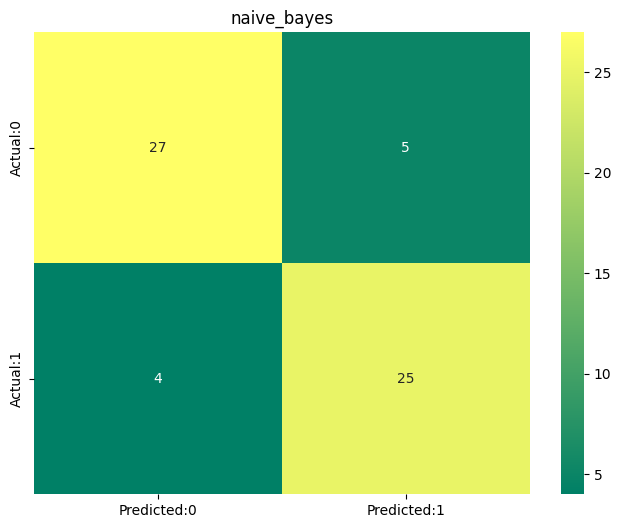

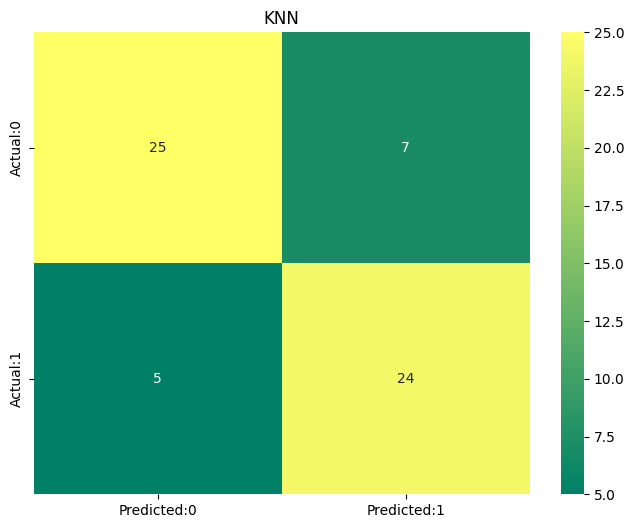

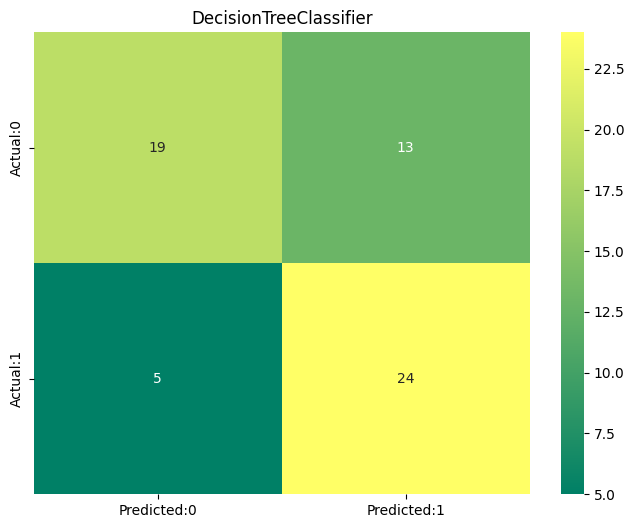

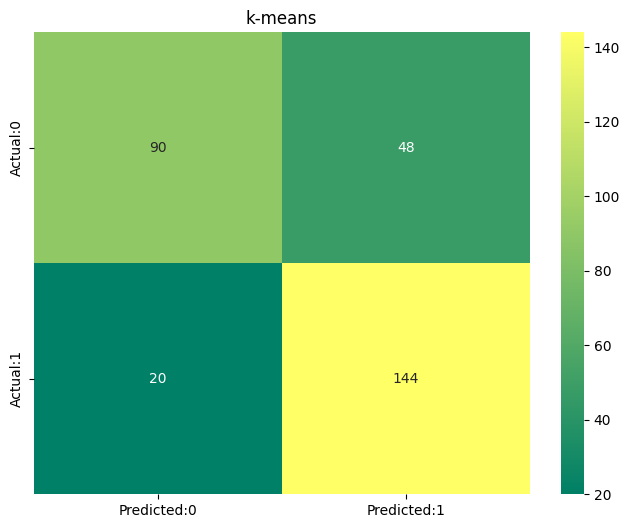

In [435]:
print("best runnig")
best_9 = heart_df.copy()
zscore(best_9,'age')
zscore(best_9,'chol')
zscore(best_9,'trestbps')
zscore(best_9,'thalach')
Normatilzation(best_9,'fbs')
Normatilzation(best_9,'ca')

# create X split and y split
X = best_9.iloc[:, :-1]
y = best_9.iloc[:, -1]
# seperating the data with X_train, X_test, y_train, y_test by using train_test_split from sklearn.model_selection
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
lst=evaluationMeasures(X_train, y_train,X_test,y_test)
AllMatrix(y_test,lst,y)